#**Clustering the feedbacks from Turkiye Student Evaluation dataset**

#**Import Necessary modules**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns    #Seaborn is an open-source Python library built on top of matplotlib. It is used for data visualization and exploratory data analysis. Seaborn works easily with dataframes and the Pandas library
import matplotlib.pyplot as plt
import warnings       # Warnings are provided to warn the developer of situations that aren't necessarily exceptions. Usually, a warning occurs when there is some obsolete of certain programming elements, such as keyword, function or class, etc
# to enable the inline plotting, where the plots/graphs will be displayed just below the cell where your plotting commands are written
%matplotlib inline   
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 99 # to avoid skipping of any attributes



---



---



---



#**Loading a dataset**

In [ ]:
df = pd.read_csv("turkiye-student-evaluation_generic.csv")
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
df.tail()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
5815,3,13,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5816,3,13,1,3,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5
5817,3,13,1,0,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
5818,3,13,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5819,3,13,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
print('No. of rows:',df.shape[0]) #patterns
print('No. of columns:',df.shape[1])

No. of rows: 5820
No. of columns: 33




---



---



---



#**Statistical information**


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instr,5820.0,2.485567,0.718473,1.0,2.0,3.0,3.0,3.0
class,5820.0,7.276289,3.688175,1.0,4.0,7.0,10.0,13.0
nb.repeat,5820.0,1.214089,0.532376,1.0,1.0,1.0,1.0,3.0
attendance,5820.0,1.675601,1.474975,0.0,0.0,1.0,3.0,4.0
difficulty,5820.0,2.783505,1.348987,1.0,1.0,3.0,4.0,5.0
Q1,5820.0,2.929897,1.341077,1.0,2.0,3.0,4.0,5.0
Q2,5820.0,3.073883,1.285251,1.0,2.0,3.0,4.0,5.0
Q3,5820.0,3.178694,1.253567,1.0,2.0,3.0,4.0,5.0
Q4,5820.0,3.082474,1.284594,1.0,2.0,3.0,4.0,5.0
Q5,5820.0,3.105842,1.278989,1.0,2.0,3.0,4.0,5.0


**Inference:**

.Descrpitive statistics of columns difficulty, Q1, Q2....Q28 are almost same.

.Mean and Median of class column approximately same.



---



---



---



#**DataType information**

In [ ]:
 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   instr       5820 non-null   int64
 1   class       5820 non-null   int64
 2   nb.repeat   5820 non-null   int64
 3   attendance  5820 non-null   int64
 4   difficulty  5820 non-null   int64
 5   Q1          5820 non-null   int64
 6   Q2          5820 non-null   int64
 7   Q3          5820 non-null   int64
 8   Q4          5820 non-null   int64
 9   Q5          5820 non-null   int64
 10  Q6          5820 non-null   int64
 11  Q7          5820 non-null   int64
 12  Q8          5820 non-null   int64
 13  Q9          5820 non-null   int64
 14  Q10         5820 non-null   int64
 15  Q11         5820 non-null   int64
 16  Q12         5820 non-null   int64
 17  Q13         5820 non-null   int64
 18  Q14         5820 non-null   int64
 19  Q15         5820 non-null   int64
 20  Q16         5820 non-null   in

**here values are in range of [1-5] , and in order to optimise the space , we can convert datatype  int64 to int8 if we have very large number of samples**



---



---



---



#**Preprocessing of Dataset**

### check for null values , if present then we have to fill the null values by mean or mode

In [ ]:
#no null values are present
df.isnull().sum()

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

**There are no null values in a given dataset.**



---



---



---



#**Data Analysis**
#**Visualisation of Data**

In [ ]:
#setting new style for graph plotting
plt.style.use("fivethirtyeight")



---




###counting number of students taught by each instructor

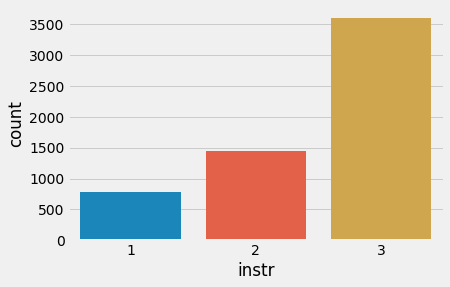

In [ ]:

sns.countplot(df['instr']) 

**from plot we can say that instructor 3 has taken more number of courses**



---



## number of students present in each class or course

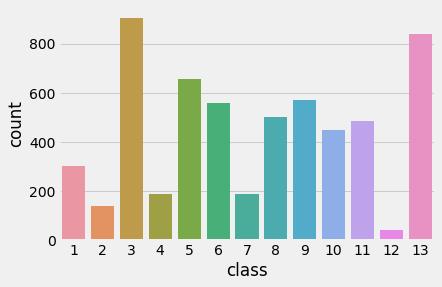

In [ ]:
sns.countplot(df['class'])

**Number of course taken by Student(course No. 3 is student favourite,Course No. 12 is mostly disliked by them)**



---



### finding mean of each questions

In [ ]:
x_questions = df.iloc[:,5:33]
q_mean = x_questions.mean(axis=0)
total_mean = q_mean.mean()

In [ ]:
q_mean = q_mean.to_frame('mean')
q_mean.reset_index(level = 0 , inplace=True)
q_mean.head()

,index,mean
0,Q1,2.929897
1,Q2,3.073883
2,Q3,3.178694
3,Q4,3.082474
4,Q5,3.105842


In [ ]:
q_mean.tail()

,index,mean
23,Q24,3.166838
24,Q25,3.312543
25,Q26,3.222165
26,Q27,3.154811
27,Q28,3.308076


### overall mean of questions

In [ ]:

total_mean

3.1861561119293085

###plotting mean of each questions

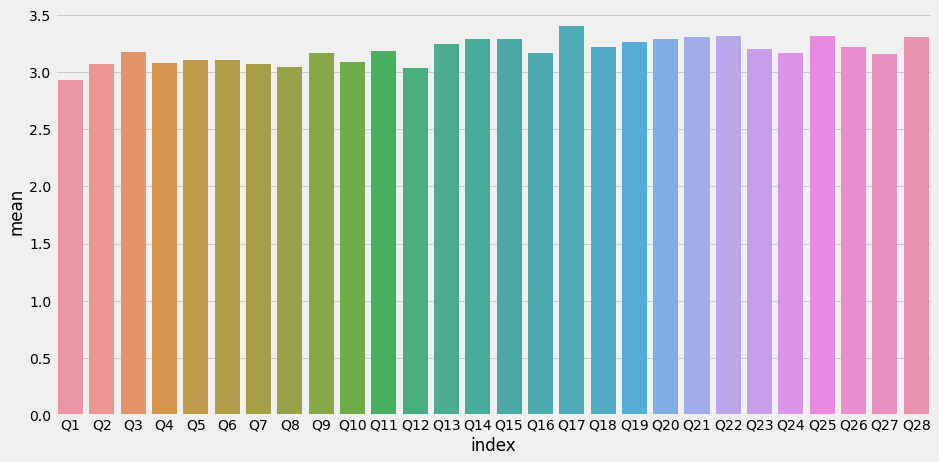

In [ ]:

plt.figure(figsize=(14,7))
sns.barplot(x='index' , y='mean' , data=q_mean)



---



### count of Number of student is taking a course how many times

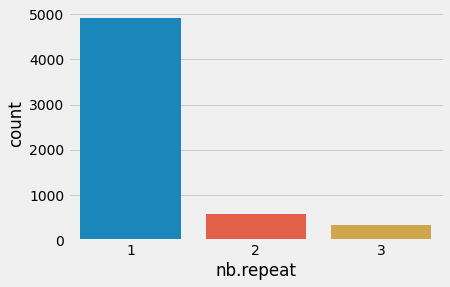

In [ ]:
sns.countplot(df['nb.repeat'])

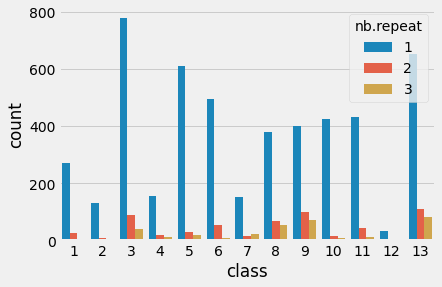

In [ ]:
sns.countplot(x='class', hue='nb.repeat', data=df)

**Course no. 13 is mostly repeated by students**



---



### Count of number of students based on difficulty level

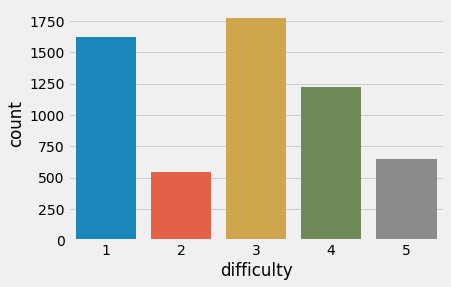

In [ ]:
sns.countplot(df['difficulty'])

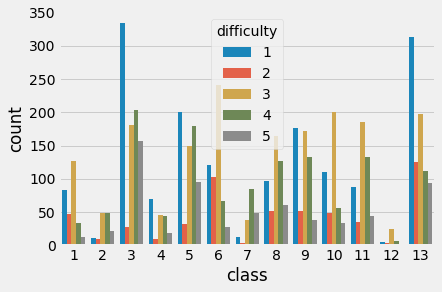

In [ ]:
sns.countplot(x='class', hue='difficulty', data=df)

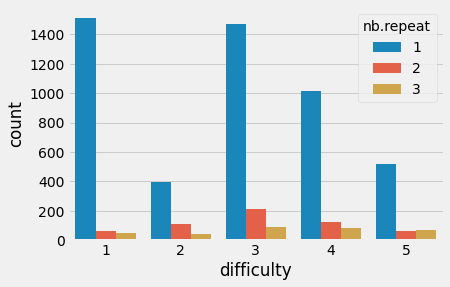

In [ ]:
sns.countplot(x='difficulty', hue='nb.repeat', data=df)



---



### Count of number of students based on attendance

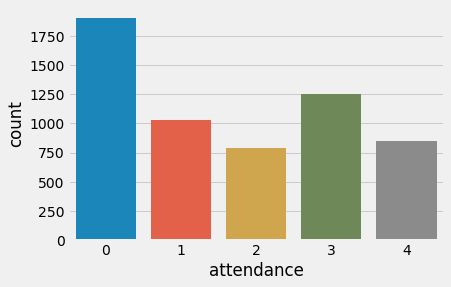

In [ ]:
sns.countplot(df['attendance'])



---



####**Below** Graph to see how the rating has been given by student for each questions

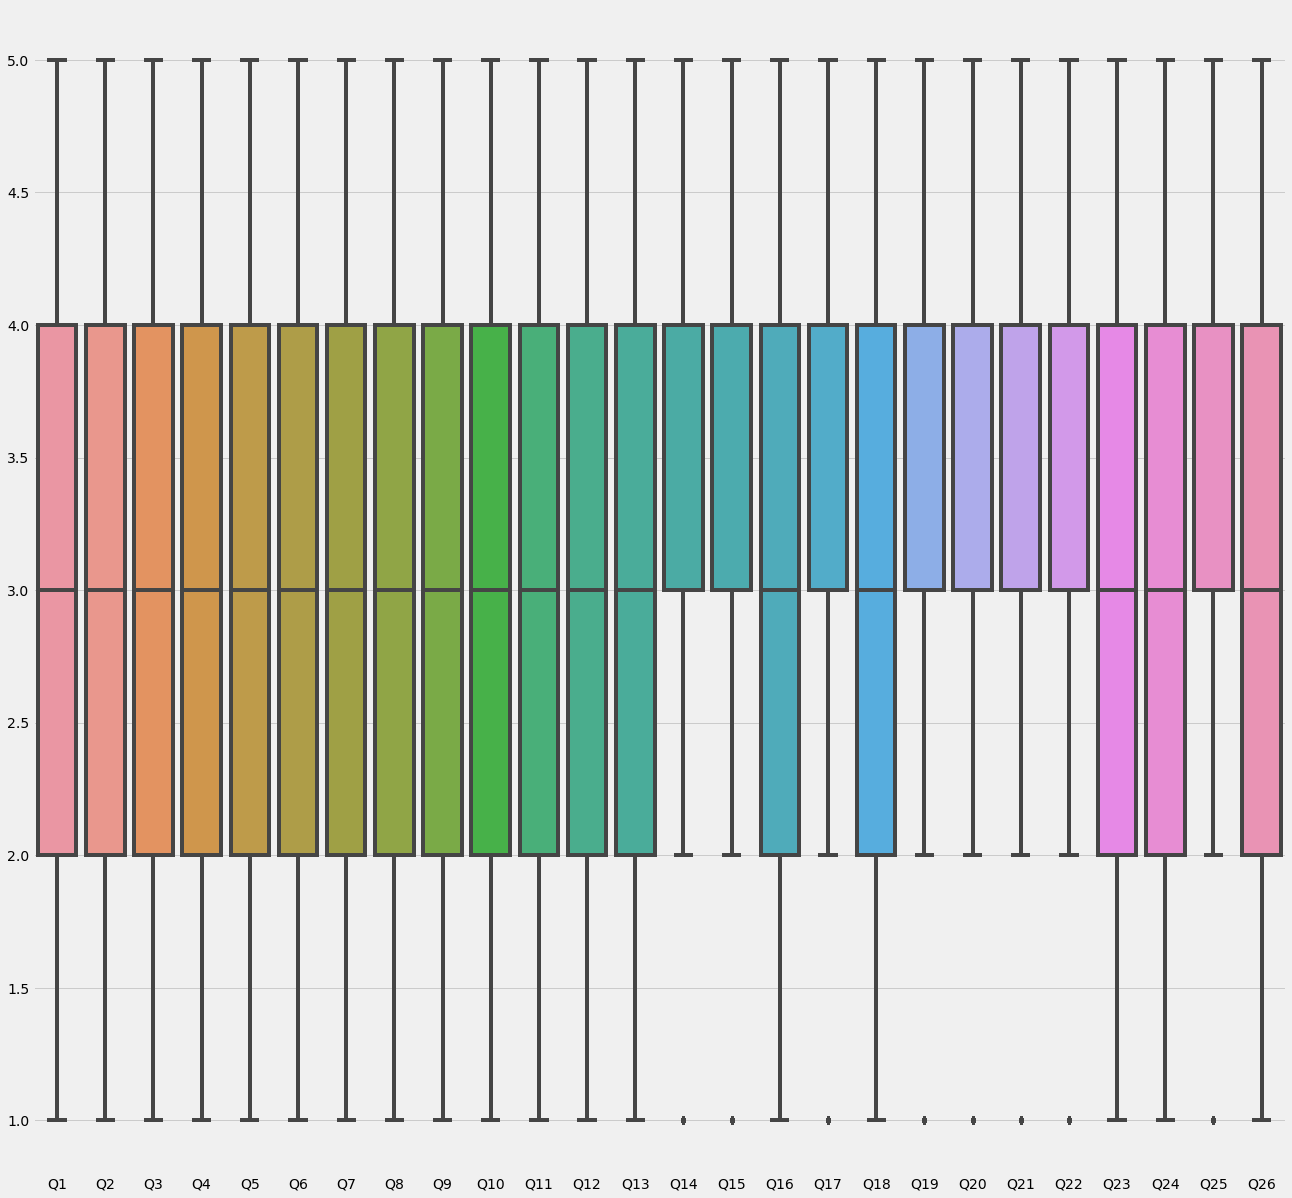

In [ ]:
plt.figure(figsize=(20, 20))
sns.boxplot(data=df.iloc[:,5:31 ]);

**from graph, we can see that very less students have given completely disagree (Rating 1) for Question Q14, Q15, Q17, Q19 - Q22, Q25**



---



###Lets understand the students have responded for the questions against classes

In [ ]:
questionmeans = []
classlist = []
questions = []
totalplotdata = pd.DataFrame(list(zip(classlist,questions,questionmeans))
                      ,columns=['class','questions', 'mean'])
for class_num in range(1,13):
    class_data = df[(df["class"]==class_num)]
    
    questionmeans = []
    classlist = []
    questions = []
    
    for num in range(1,13):
        questions.append(num)
    #Class related questions are from Q1 to Q12
    for col in range(5,17):
        questionmeans.append(class_data.iloc[:,col].mean())
    classlist += 12 * [class_num] 
    print(classlist)
    plotdata = pd.DataFrame(list(zip(classlist,questions,questionmeans))
                      ,columns=['class','questions', 'mean'])
    totalplotdata = totalplotdata.append(plotdata, ignore_index=True)
    

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]




---



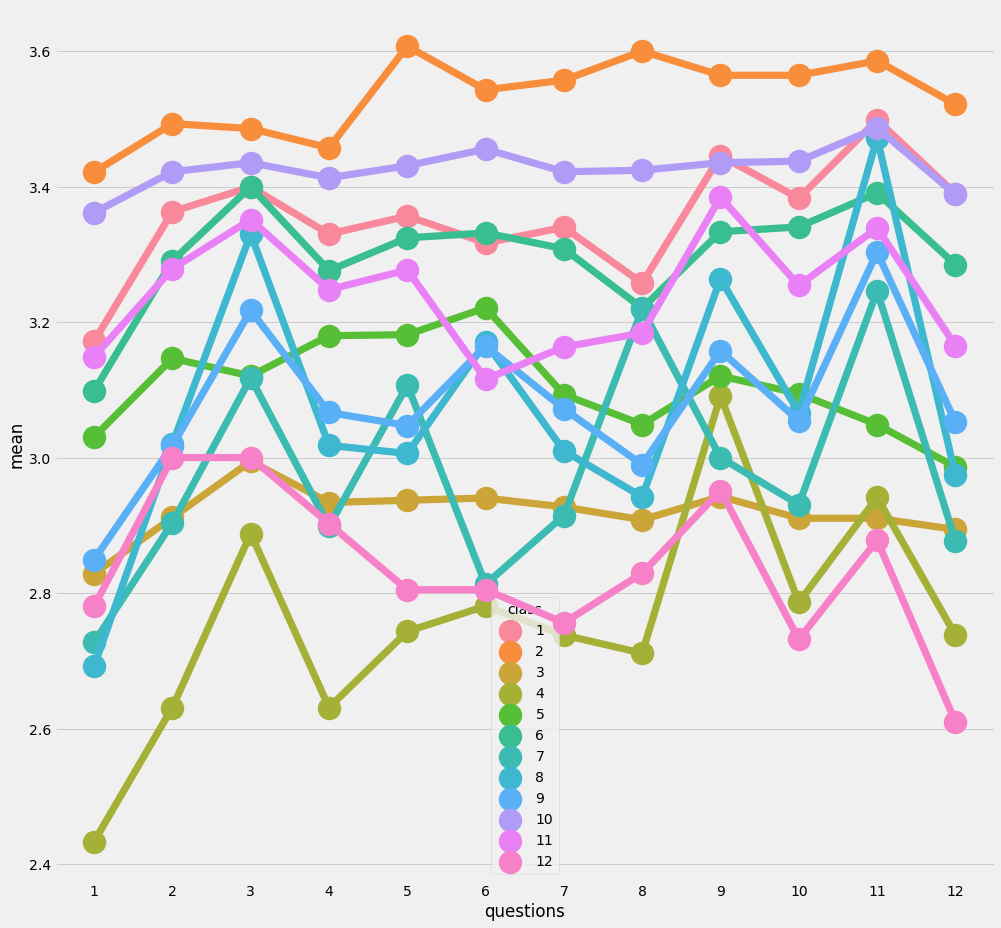

In [ ]:
plt.figure(figsize=(15, 15))
sns.pointplot(x="questions", y="mean", data=totalplotdata, hue="class")

**from graph we can say that we have best ratings from Class 2 and worst rateing from class 4 students**



---



###Lets see how rating has been given against instructor wise.

In [ ]:
# Calculate mean for each question response for all the classes.
questionmeans = []
inslist = []
questions = []
totalplotdata = pd.DataFrame(list(zip(inslist,questions,questionmeans))
                      ,columns=['ins','questions', 'mean'])
for ins_num in range(1,4):
    ins_data = df[(df["instr"]==ins_num)]
    questionmeans = []
    inslist = []
    questions = []
    
    for num in range(13,29):
        questions.append(num)
    
    for col in range(17,33):
        questionmeans.append(ins_data.iloc[:,col].mean())
    inslist += 16 * [ins_num] 
    plotdata = pd.DataFrame(list(zip(inslist,questions,questionmeans))
                      ,columns=['ins','questions', 'mean'])
    totalplotdata = totalplotdata.append(plotdata, ignore_index=True)


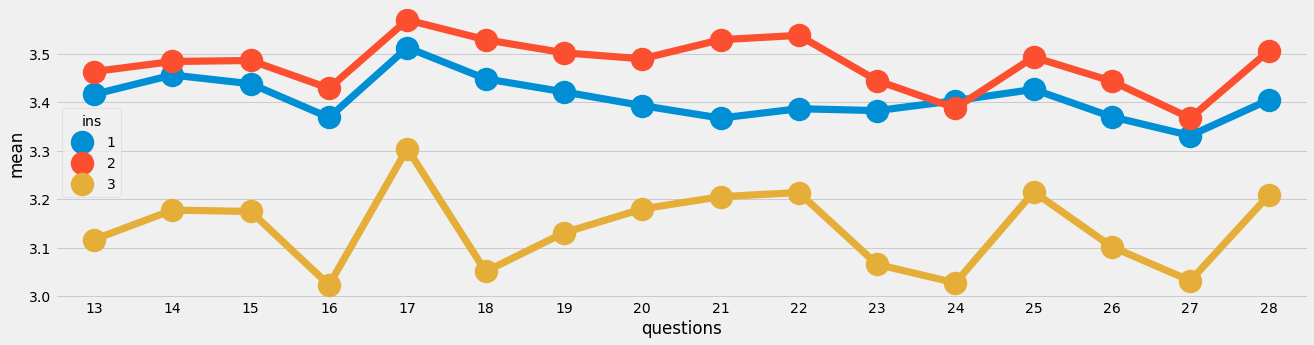

In [ ]:
plt.figure(figsize=(20, 5))
sns.pointplot(x="questions", y="mean", data=totalplotdata, hue="ins")

**Inference**

.from the graph we can see that According to the Student ratings we see that Instructor 1 and 2 are performing well 
and got similar rateings but Instructor 3 got less ratings.

.So we can further explore which course instructor 3 teaches and find out the which course got least ratings 



---



###So we can further explore which course instructor 3 teaches and find out the which course got least ratings

In [ ]:
# Calculate mean for each question response for all the classes for Instructor 3
dataset_inst3 = df[(df["instr"]==3)]
class_array_for_inst3 = dataset_inst3["class"].unique().tolist()
questionmeans = []
classlist = []
questions = []
totalplotdata = pd.DataFrame(list(zip(classlist,questions,questionmeans))
                      ,columns=['class','questions', 'mean'])
for class_num in class_array_for_inst3:
    class_data = dataset_inst3[(dataset_inst3["class"]==class_num)]
    
    questionmeans = []
    classlist = []
    questions = []
    
    for num in range(1,13):
        questions.append(num)
    
    for col in range(5,17):
        questionmeans.append(class_data.iloc[:,col].mean())
    classlist += 12 * [class_num]
    
    plotdata = pd.DataFrame(list(zip(classlist,questions,questionmeans))
                      ,columns=['class','questions', 'mean'])
    totalplotdata = totalplotdata.append(plotdata, ignore_index=True)

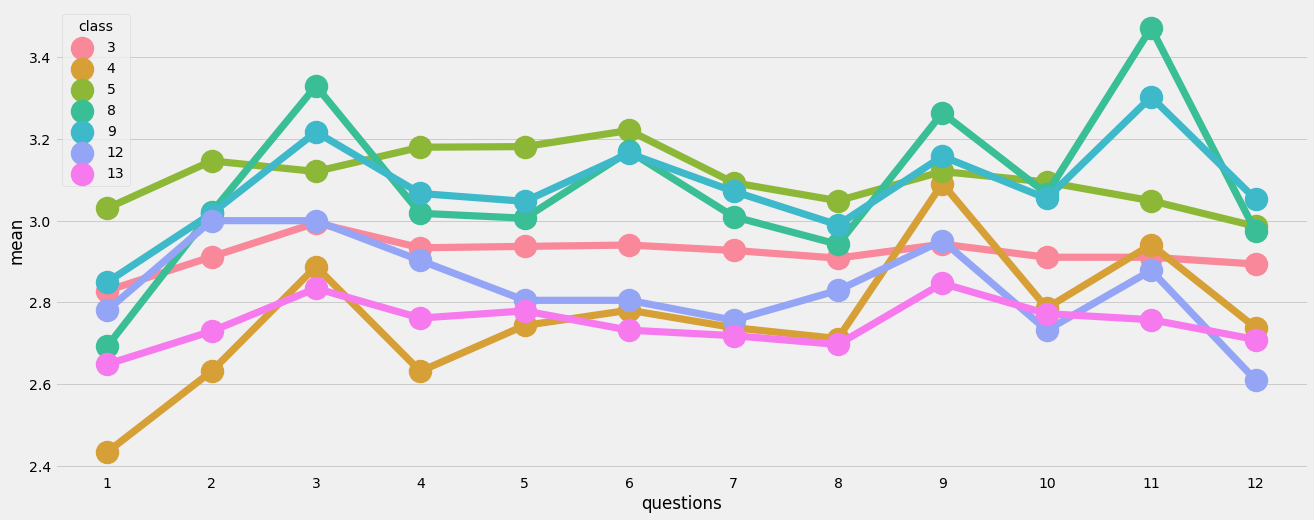

In [ ]:
plt.figure(figsize=(20, 8))
sns.pointplot(x="questions", y="mean", data=totalplotdata, hue="class")

**from analysis of graph we can recommend the instructor 3 for check on course 4 and 13.**



---



###Other Plots

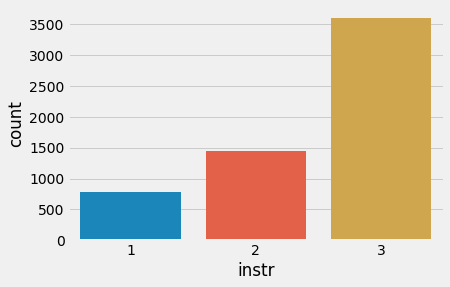

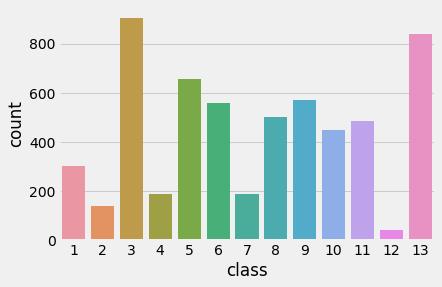

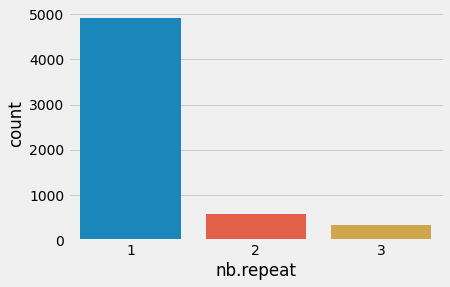

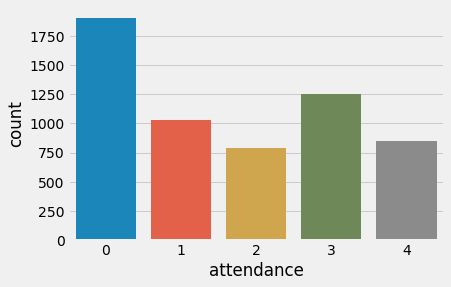

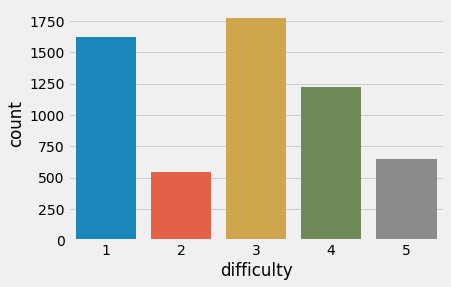

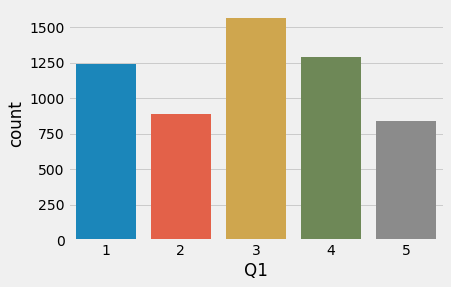

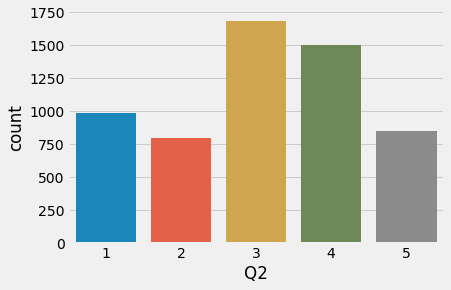

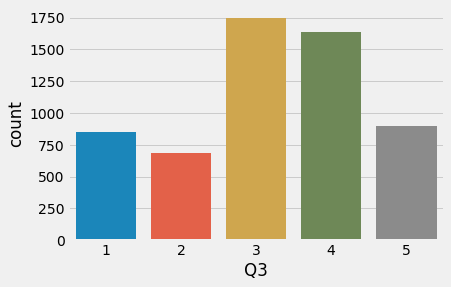

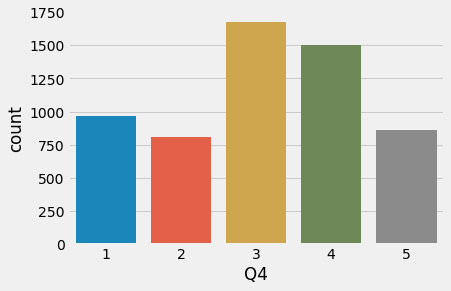

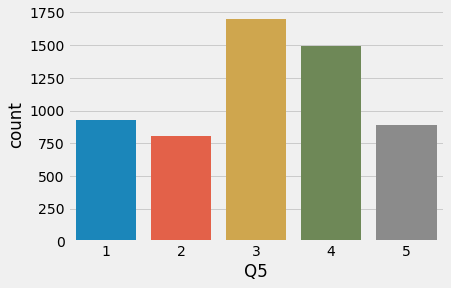

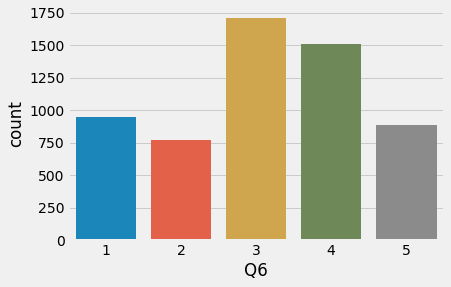

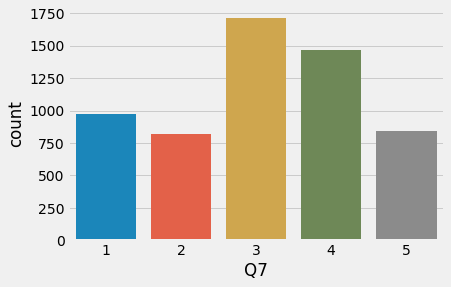

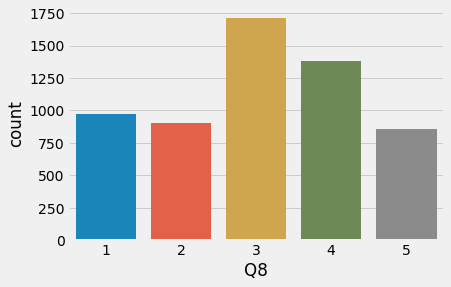

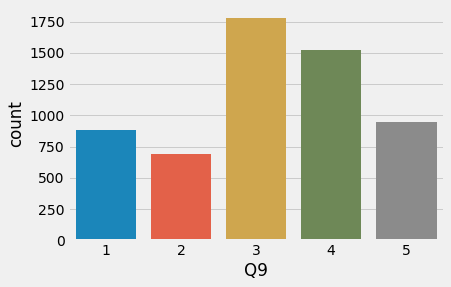

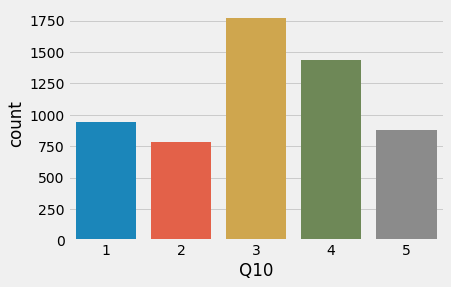

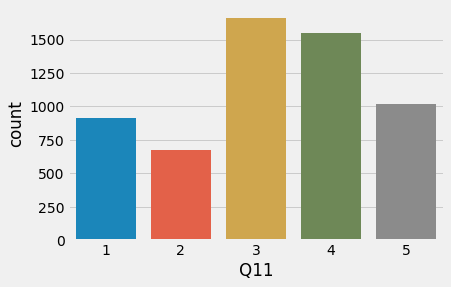

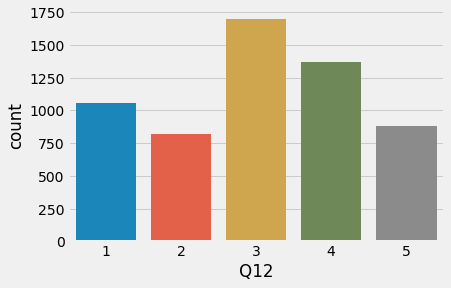

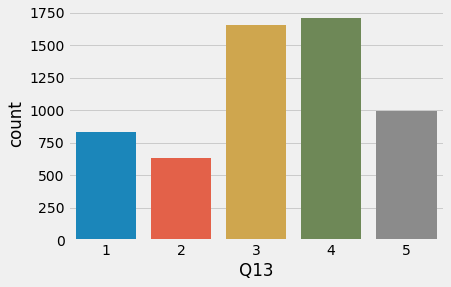

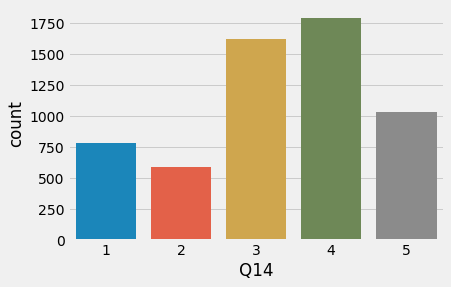

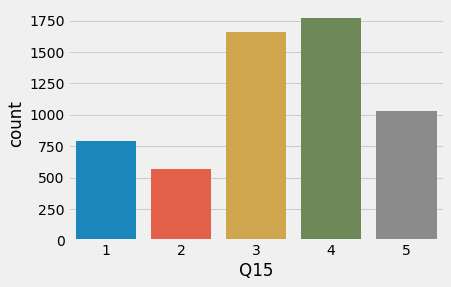

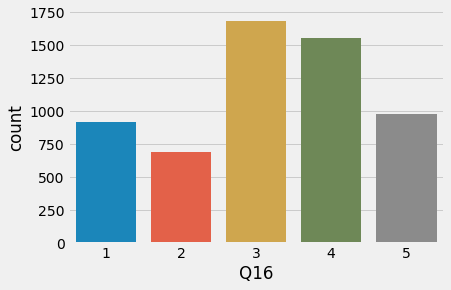

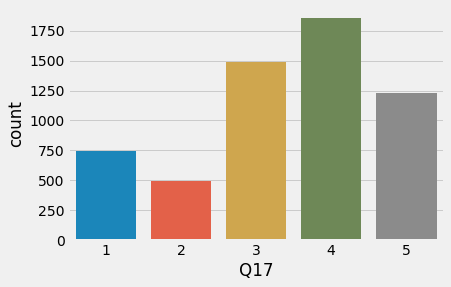

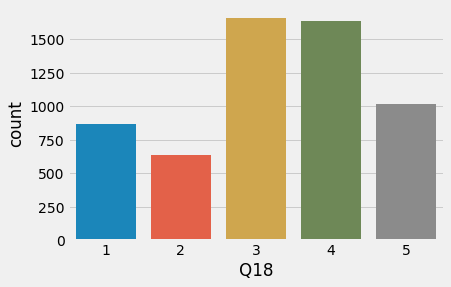

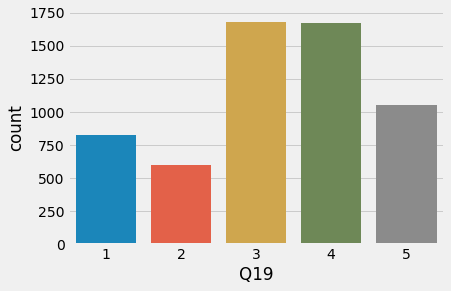

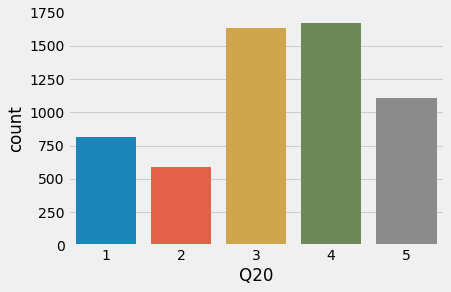

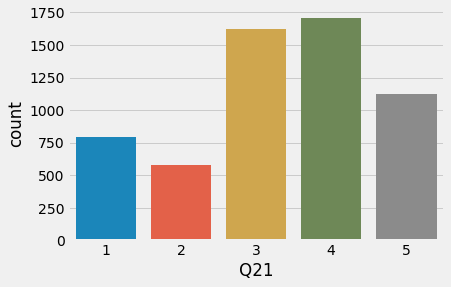

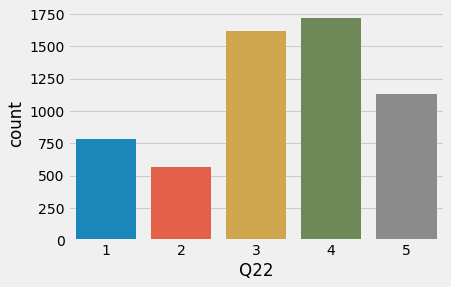

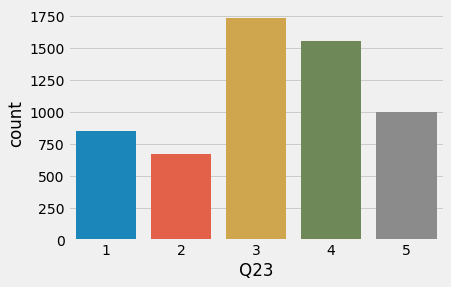

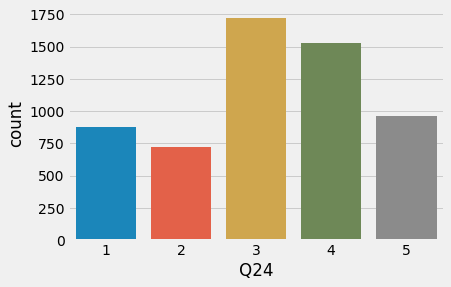

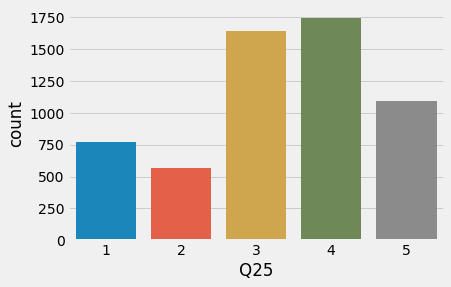

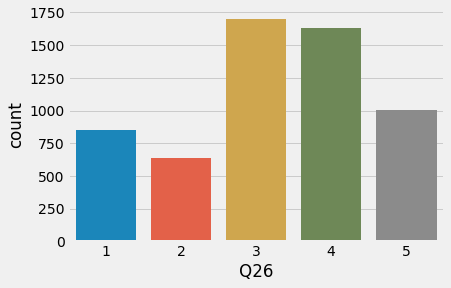

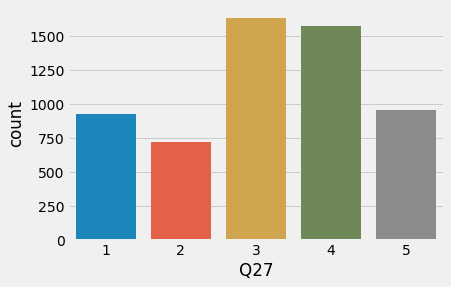

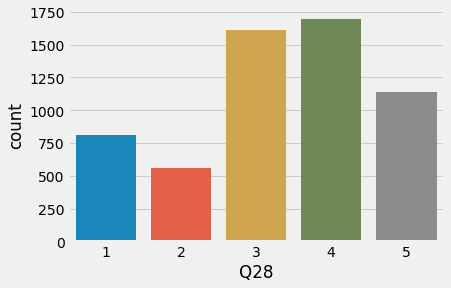

In [ ]:
# Vizualising the distinct count of each feature

for i in df.columns:
    sns.countplot(i,data=df)
    plt.show()

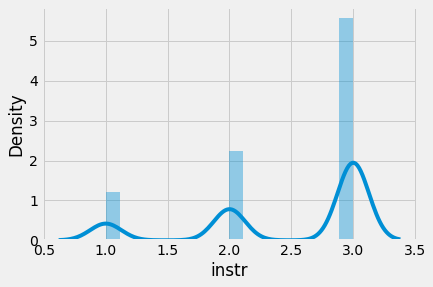

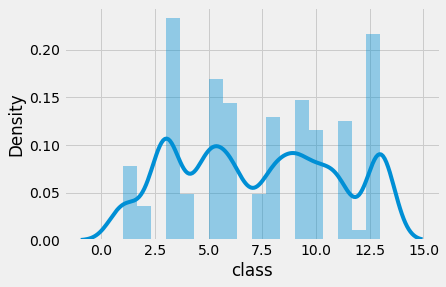

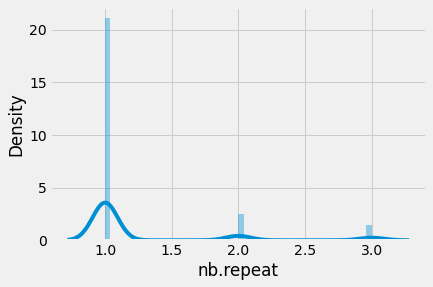

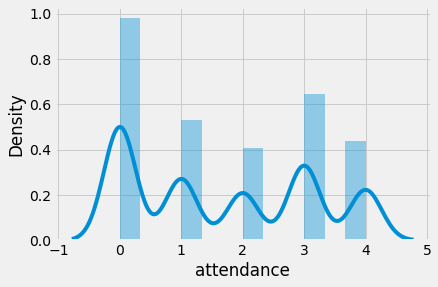

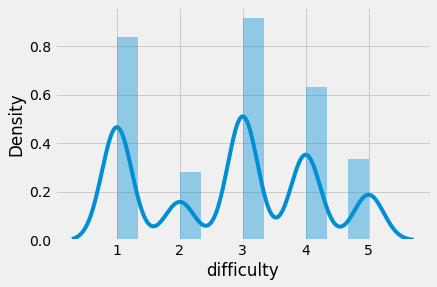

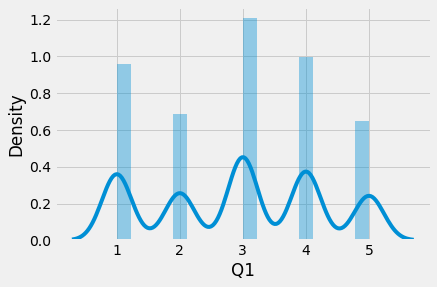

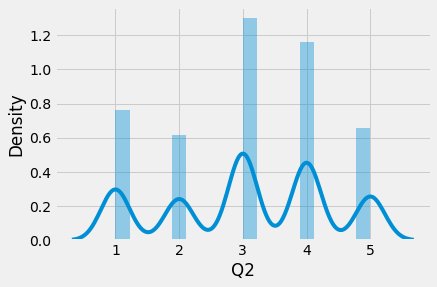

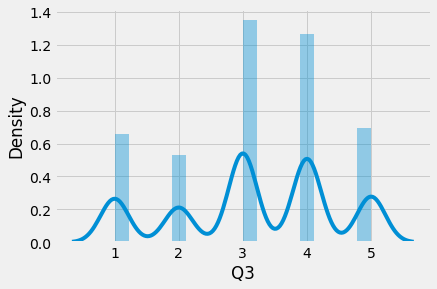

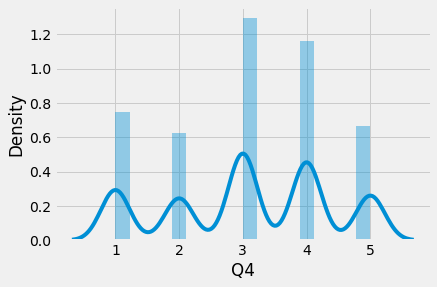

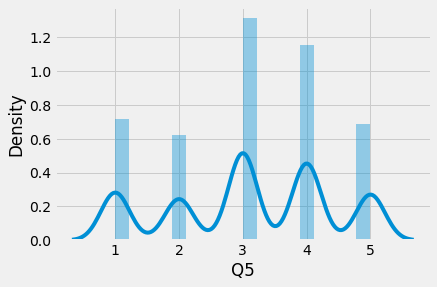

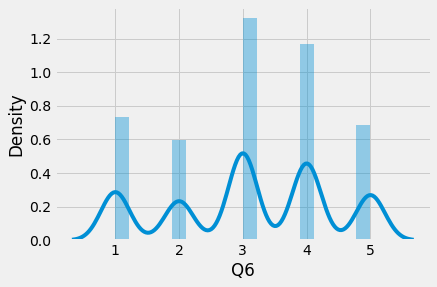

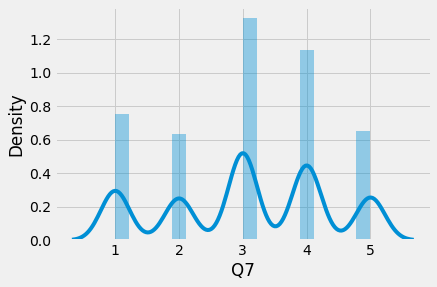

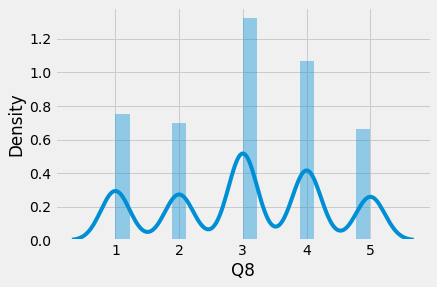

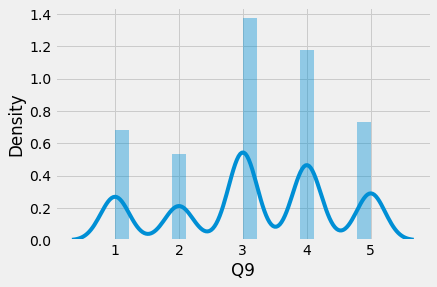

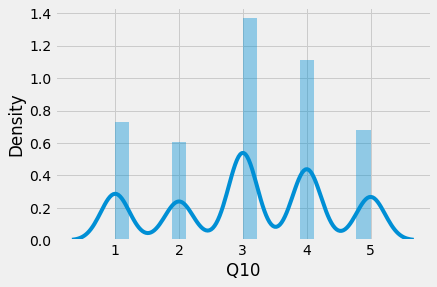

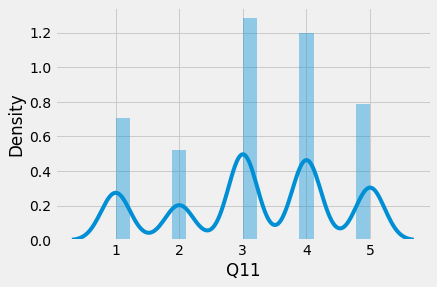

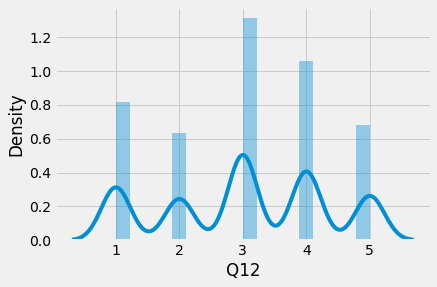

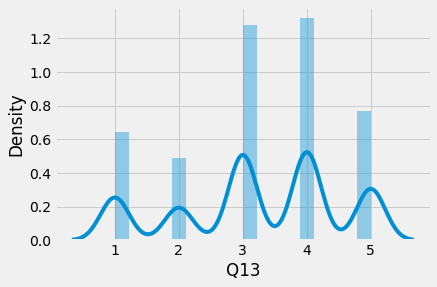

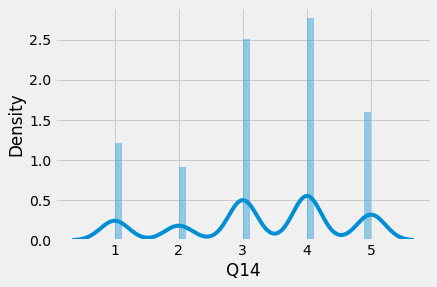

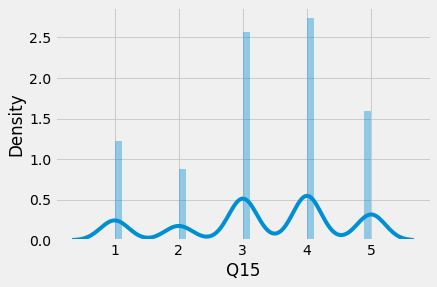

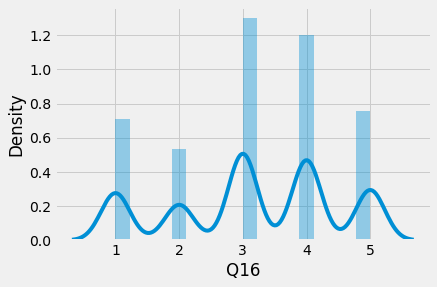

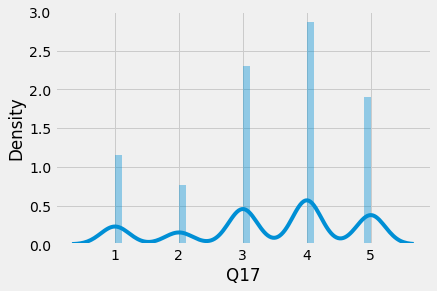

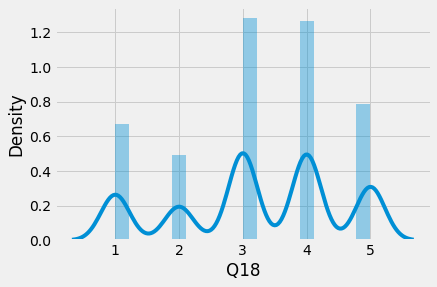

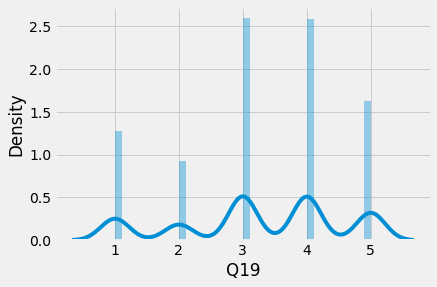

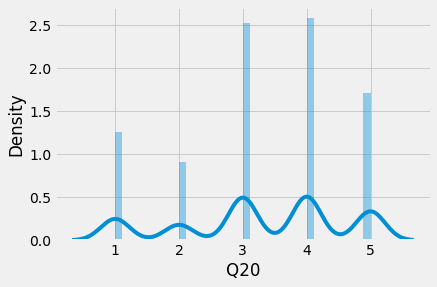

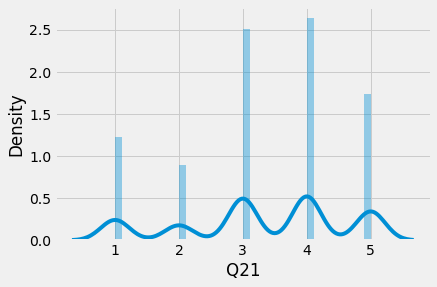

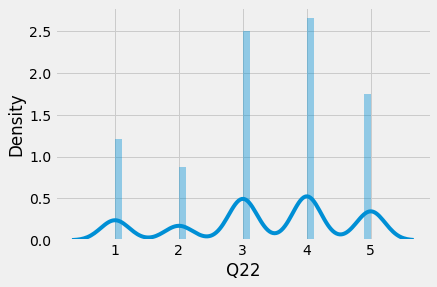

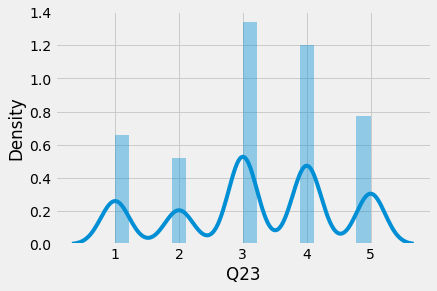

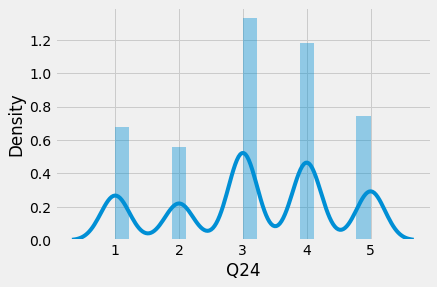

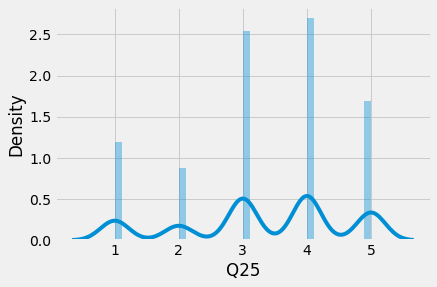

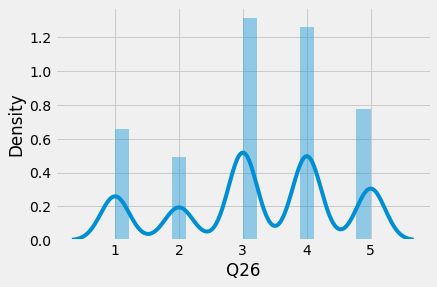

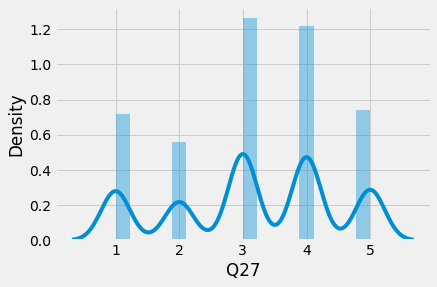

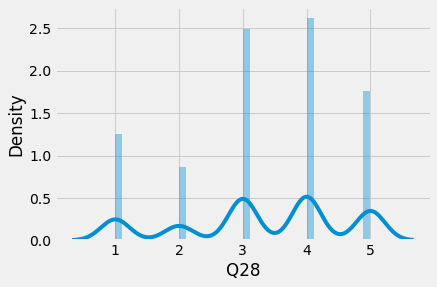

In [ ]:
# Vizualizing the distribution of each independent variable, to understand the spread of data

for i in df.columns:
    sns.distplot(df[i])
    plt.show()

**From the graphs, we can understand that data is randomly distributed. Thus we proceed with our clustering approch.**



---

---





---



#**Coorelation Matrix**

.A correlation matrix is a table showing correlation coefficients between variables.

.Each cell in the table shows the correlation between two variables.

.A correlation matrix is used to summarize data, as an input into a more advanced analysis.

.In supervised learning we remove a attribute if we have a negative correlation

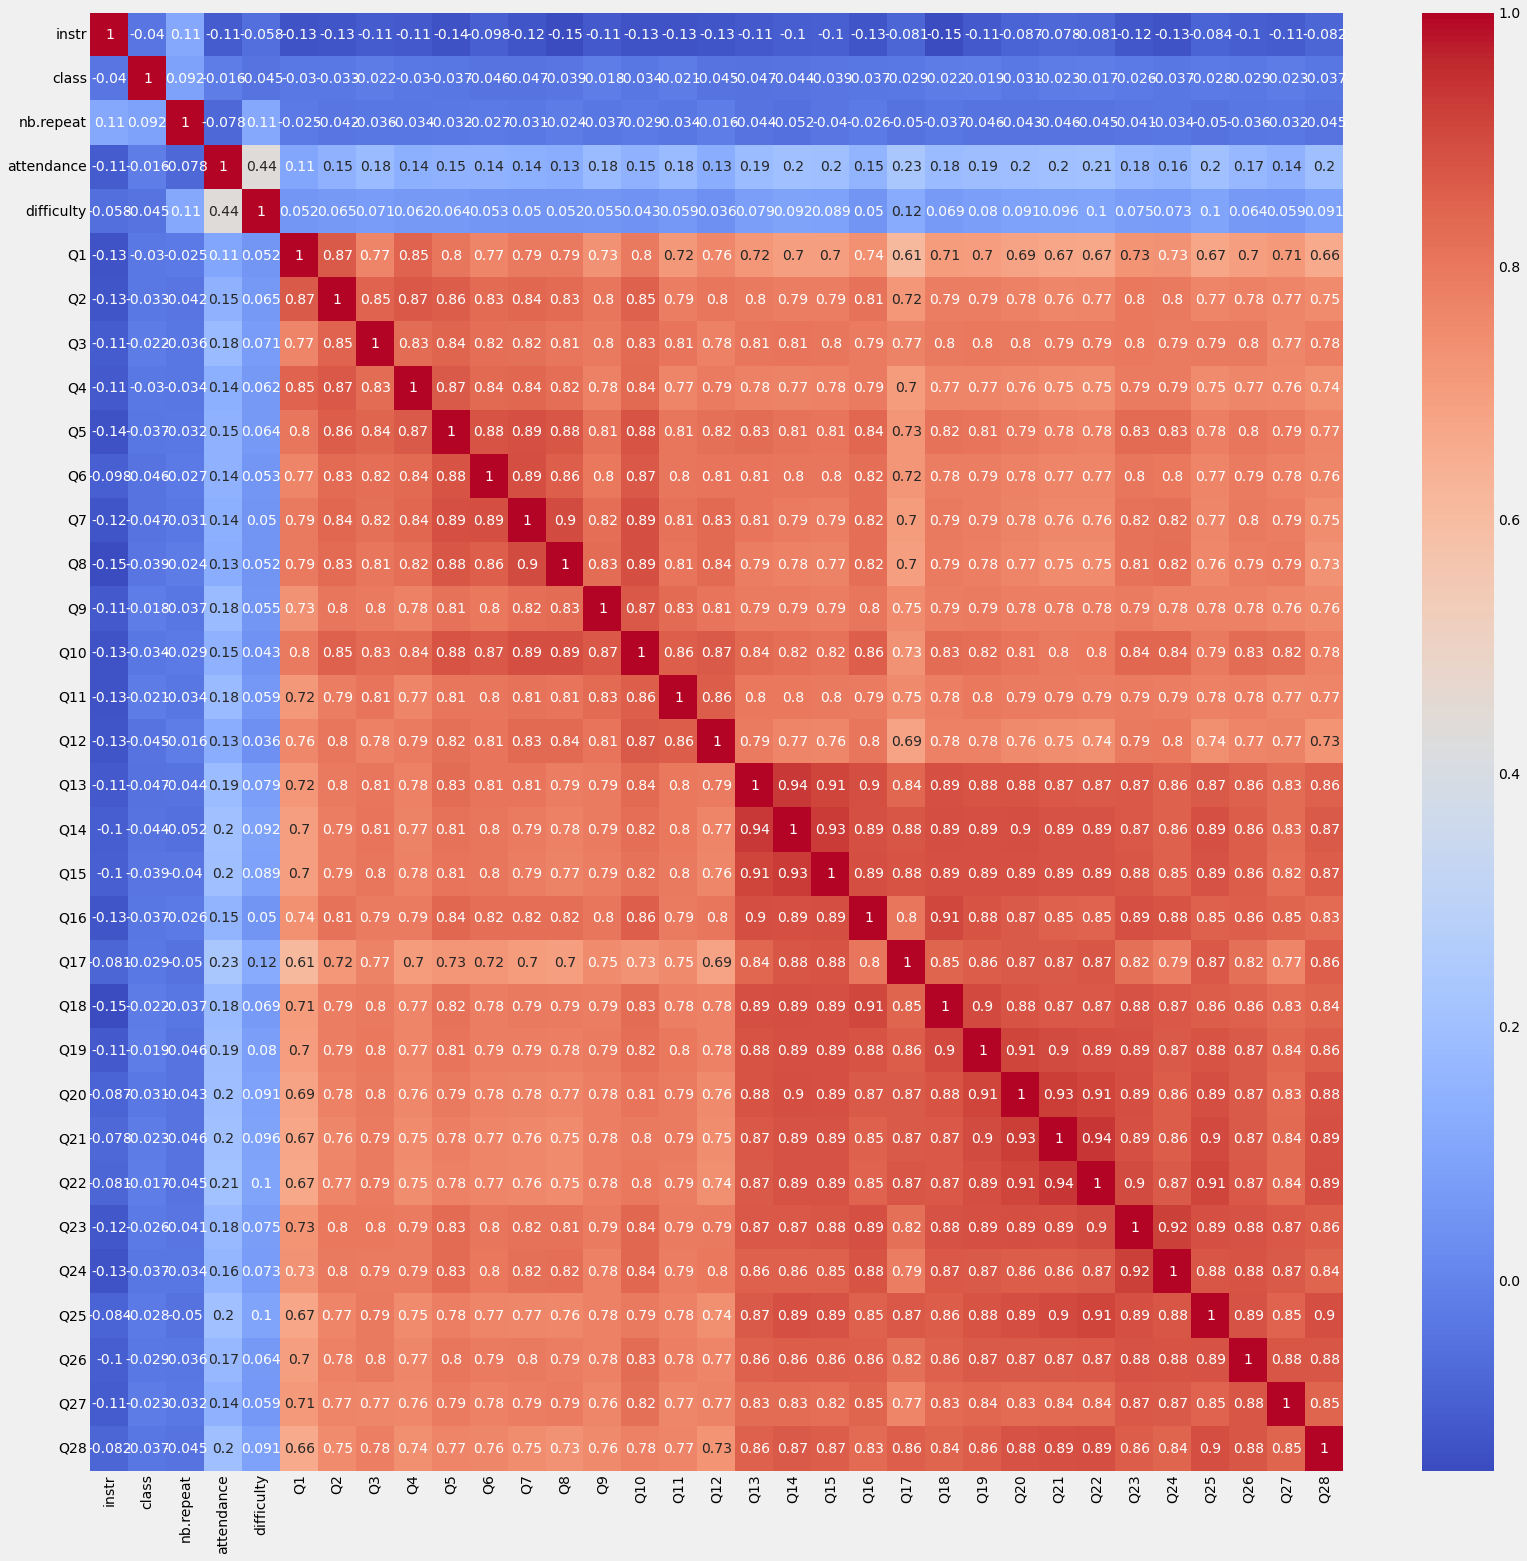

In [ ]:
corr = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, cmap='coolwarm')

**here it has negative correlation for 1st 5 attributes ,so we try to remove those attributes**



---



---



---



#Lets try to cluster all the students based on the Question responses data.

In [ ]:
df.columns

Index(['instr', 'class', 'nb.repeat', 'attendance', 'difficulty', 'Q1', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'Q27', 'Q28'],
      dtype='object')



---



---



---



#**Dataset**

In [ ]:
#X_whole contains all 28 features
X_whole = df.iloc[:, 5:33]
X_whole

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5816,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5
5817,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
5818,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1




---



---



---



#**Normalization**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
X_whole = pd.DataFrame(sc.fit_transform(X_whole),columns=X_whole.columns)
print(X_whole)

            Q1        Q2        Q3        Q4        Q5        Q6        Q7  \
0     0.052278 -0.057490 -0.142561 -0.064208 -0.082761 -0.083851 -0.051856   
1     0.052278 -0.057490 -0.142561 -0.064208 -0.082761 -0.083851 -0.051856   
2     1.543745  1.498760  1.453023  1.492837  1.481107  1.477798  1.511882   
3     0.052278 -0.057490 -0.142561 -0.064208 -0.082761 -0.083851 -0.051856   
4    -1.439189 -1.613740 -1.738145 -1.621254 -1.646630 -1.645501 -1.615594   
...        ...       ...       ...       ...       ...       ...       ...   
5815 -1.439189 -1.613740 -1.738145 -1.621254 -1.646630 -1.645501 -1.615594   
5816  0.798012  0.720635  0.655231  0.714315  0.699173  0.696973  0.730013   
5817  1.543745  1.498760  1.453023  1.492837  1.481107  1.477798  1.511882   
5818 -1.439189 -1.613740 -1.738145 -1.621254 -1.646630 -1.645501 -1.615594   
5819 -1.439189 -1.613740 -1.738145 -1.621254 -1.646630 -1.645501 -1.615594   

            Q8        Q9       Q10       Q11       Q12       Q1



---



---



---



#**PCA**

In [ ]:
#reducing n-dimension data (n:28) to 2 dimension
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_whole)

In [ ]:
#X_pca contains 2 features
X_pca

array([[ 0.78287487,  0.4050173 ],
       [ 0.78287487,  0.4050173 ],
       [-7.50179941,  0.50147365],
       ...,
       [-7.50179941,  0.50147365],
       [ 9.06754915,  0.30856096],
       [ 9.06754915,  0.30856096]])

In [ ]:
# how much info we retained from the dataset
pca.explained_variance_ratio_.cumsum()[1]

0.8676364447297639



---



---



---



---



#**Applying the ML models discussed in class** 

##Model 1: **K-means Algorithm**

In [ ]:
#datasets

data_kmeans_pca = X_pca
data_kmeans_whole = X_whole.to_numpy()

print("Reduced dataset : \n" ,data_kmeans_pca , "\n" )
print("Full dataset : \n" ,data_kmeans_whole , "\n" )

Reduced dataset : 
 [[ 0.78287487  0.4050173 ]
 [ 0.78287487  0.4050173 ]
 [-7.50179941  0.50147365]
 ...
 [-7.50179941  0.50147365]
 [ 9.06754915  0.30856096]
 [ 9.06754915  0.30856096]] 

Full dataset : 
 [[ 0.05227822 -0.05749034 -0.14256075 ... -0.17485237 -0.11984497
  -0.24094785]
 [ 0.05227822 -0.05749034 -0.14256075 ... -0.17485237 -0.11984497
  -0.24094785]
 [ 1.5437451   1.49875981  1.45302307 ...  1.39922464  1.42842963
   1.32326465]
 ...
 [ 1.5437451   1.49875981  1.45302307 ...  1.39922464  1.42842963
   1.32326465]
 [-1.43918866 -1.61374049 -1.73814458 ... -1.74892938 -1.66811957
  -1.80516036]
 [-1.43918866 -1.61374049 -1.73814458 ... -1.74892938 -1.66811957
  -1.80516036]] 



###Using Inbuilt Functions

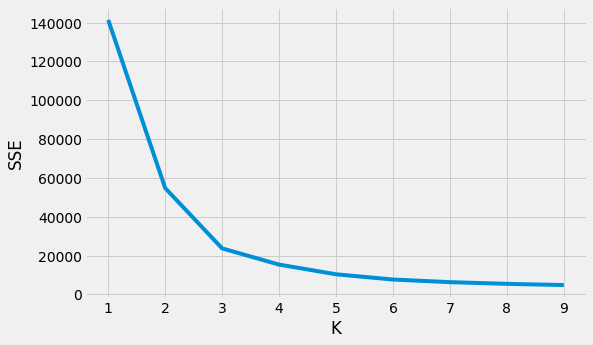

In [ ]:
# 1. Trained the model Using reduced dataset

from sklearn.cluster import KMeans
sse =[] #stores sse of different k
centers = [] #stores centers of different k



for k in range(1,10):   
    km = KMeans(n_clusters=k)
    km.fit(data_kmeans_pca)  #applying k-means
    sse.append(km.inertia_)      #storing SSE                           
    centers.append(km.cluster_centers_)  #storing centers



#Choose the value of K  using the Elbow method
plt.figure(figsize=(8,5))
plt.plot(range(1, 10), sse)
plt.ylabel('SSE')
plt.xlabel('K')
plt.show()

selecting k=3 , as there is a small change in SSE around this

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

# use k=3 and train the model using reduced dataset


model = KMeans(n_clusters=3)
model.fit(data_kmeans_pca)  #train the model
kmeans_labels = model.predict(data_kmeans_pca) #cluster assignment
kmeans_sse = model.inertia_
kmeans_centers = model.cluster_centers_


print("Cluster Centers: \n" , kmeans_centers , "\n" )
print("Cluster labels: \n" ,kmeans_labels , "\n")
print("SSE : " , kmeans_sse , "\n")
print("Silhoutte score:",silhouette_score(data_kmeans_pca,kmeans_labels ) ,"\n")


from collections import Counter
print("Elements in each Cluster : \n " , Counter(kmeans_labels) ,"\n")

Cluster Centers: 
 [[ 7.29310179  0.24336363]
 [-4.77039519  0.16346168]
 [ 0.71398896 -0.28144993]] 

Cluster labels: 
 [2 2 1 ... 1 0 0] 

SSE :  23705.24538545349 

Silhoutte score: 0.5740803780869859 

Elements in each Cluster : 
  Counter({2: 2362, 1: 2229, 0: 1229}) 



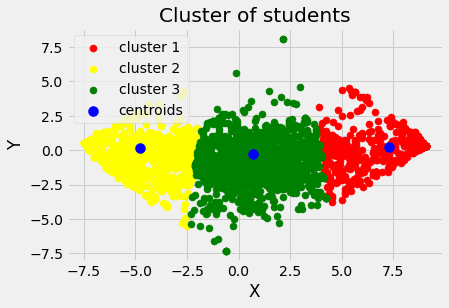

In [ ]:
#visualization of each cluster with their centroids
plt.scatter(data_kmeans_pca[kmeans_labels==0, 0], data_kmeans_pca[kmeans_labels==0, 1], s=50, c='red', label='cluster 1')
plt.scatter(data_kmeans_pca[kmeans_labels==1, 0], data_kmeans_pca[kmeans_labels==1, 1], s=50, c='yellow', label='cluster 2')
plt.scatter(data_kmeans_pca[kmeans_labels==2, 0], data_kmeans_pca[kmeans_labels==2, 1], s=50, c='green', label='cluster 3')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:, 1], s=100, c='blue', label='centroids')
plt.title('Cluster of students')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

**Inference:**

Looking at the above graph , i see we have 3 clusters of students who have given like Negative, Neutral and Positive feedback

cluster1: positive ratings

cluster2: negative ratings overall

cluster3: neutral ratings



---




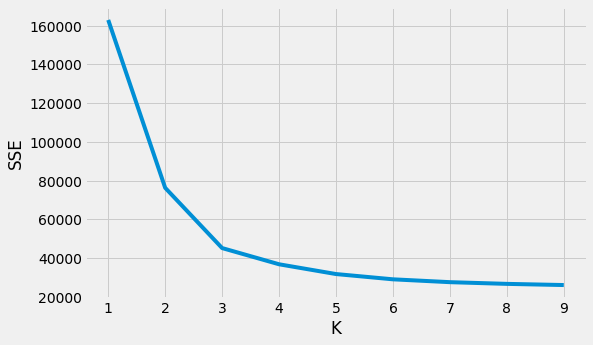

In [ ]:
# 2. Trained the model Using whole dataset

from sklearn.cluster import KMeans
sse =[] #stores sse of different k
centers = [] #stores centers of different k



for k in range(1,10):   
    km = KMeans(n_clusters=k)
    km.fit(data_kmeans_whole)  #applying k-means
    sse.append(km.inertia_)      #storing SSE                           
    centers.append(km.cluster_centers_)  #storing centers



#Choose the value of K  using the Elbow method
plt.figure(figsize=(8,5))
plt.plot(range(1, 10), sse)
plt.ylabel('SSE')
plt.xlabel('K')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

# use k=3 and train the model using full dataset


model = KMeans(n_clusters=3)
model.fit(data_kmeans_whole)  #train the model
kmeans_labels = model.predict(data_kmeans_whole) #cluster assignment
kmeans_sse = model.inertia_
kmeans_centers = model.cluster_centers_


print("Cluster Centers: \n" , kmeans_centers , "\n" )
print("Cluster labels: \n" ,kmeans_labels , "\n")
print("SSE : " , kmeans_sse , "\n")
print("Silhoutte score:",silhouette_score(data_kmeans_whole,kmeans_labels ) ,"\n")


from collections import Counter
print("Elements in each Cluster : \n " , Counter(kmeans_labels) ,"\n")

Cluster Centers: 
 [[ 0.86994199  0.92310783  0.88859156  0.9039683   0.94333022  0.91135831
   0.93416174  0.93110541  0.89421867  0.96142783  0.8870594   0.90496031
   0.90920631  0.8937138   0.8924702   0.93634071  0.80310875  0.91151466
   0.90435189  0.88755686  0.87928136  0.88195941  0.93358688  0.93366553
   0.88048628  0.9077228   0.89497297  0.86080793]
 [-1.14223129 -1.29944893 -1.33210228 -1.28144235 -1.3403515  -1.32884691
  -1.30552021 -1.29537471 -1.31108784 -1.35024292 -1.32571202 -1.26652026
  -1.45147885 -1.4779554  -1.4621331  -1.41523117 -1.41114855 -1.43194462
  -1.45125425 -1.46664998 -1.46112692 -1.45621374 -1.42897268 -1.40352589
  -1.45341509 -1.4188603  -1.36174275 -1.43321406]
 [-0.22701678 -0.19546512 -0.14593694 -0.18676857 -0.19328456 -0.16910439
  -0.20273707 -0.20512645 -0.1621657  -0.20521554 -0.14781254 -0.19545901
  -0.10334525 -0.07497199 -0.08202143 -0.14777806 -0.02422302 -0.11567422
  -0.09888284 -0.07503939 -0.07010338 -0.07518284 -0.13803923 -0.



---



---



###Using Own Implementation

In [ ]:
#importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
# K-means Algorithm 



#computes euclidean distance between x and y
def euclidianDist( x, y):
  return np.sqrt(np.sum(np.power((x - y), 2)))





# X: dataset without label column and it contains 4 features and 150 patterns
# k: number of clusters
# mx_itr : maximum no of iterations/ convergence criteria of kMeans  

def kMeans(X,k,mx_itr=300 ):
  centers = {}

  #step 1: randomly choose k objects from dataset X as intial cluster centers
  for i in range(k):
    centers[i] = X[i]
  
  #step 4:check for convergence
  for i in range(mx_itr):
    curr_classification = {}   # stores the k clusters
    distance = []       # stores distance between curr obj and k cluster centers
    
    for j in range(k):
      curr_classification[j] = []  

    #step 2: for each objects in X do some operations:
    for row in X:

      #1: compute distance between curr obj and k cluster centers
      distance = [euclidianDist(row,centers[center]) for center in centers]

      #2: assign the object to that cluster to which it is closest by finding the index of minimum distance cluster center
      curr_class = distance.index(min(distance))
      curr_classification[curr_class].append(row)

    #step 3: update the cluster centers by taking the average of the patterns that belong to that cluster
    for j in range(k):  
      centers[j] = np.average(curr_classification[j],axis=0)  
    
  return centers






#classify each object to its closest cluster
# predicts cluster of each objects : means objects belong to which cluster
def predict(X,centers):
  cls =[]
  for row in X:
    distance = [euclidianDist(row,centers[center]) for center in centers]
    curr_class = distance.index(min(distance))
    cls.append(curr_class)
  return np.array(cls)







# calculates SSE
# x: dataset X
# y: cluster no of each objects /objects belong to which cluster
# center: centers of k clusters
def distortion(x,y,center):
  unique = np.unique(y)
  classes = []
  for i in range(len(unique)):
    cls = x[y == unique[i]]
    classes.append(cls)
  
  dist = 0
  for i in range(len(unique)):
    for j in range(len(classes[i])):
      dist += (euclidianDist(classes[i][j],center[i])**2)
             
  return dist



---



In [ ]:
##3. Trained the model Using reduced dataset

kmeans_center = kMeans(data_kmeans_pca,3)  #finding k cluster centers after k-means operation
kmeans_labels = predict(data_kmeans_pca,kmeans_center) ##classify each object to its closest cluster
kmeans_sse = distortion(data_kmeans_pca ,kmeans_labels , kmeans_center )


print("Cluster Center: \n" ,kmeans_center ,"\n")
print("Class labels: \n",kmeans_labels , "\n")
print("SSE: ", kmeans_sse, "\n")
print(" Silhoutte score:",silhouette_score(data_kmeans_pca, kmeans_labels),"\n")


from collections import Counter
print("Elements in Each Cluster: \n" , Counter(kmeans_labels) ,"\n")

Cluster Center: 
 {0: array([-0.77052189, -0.11566042]), 1: array([6.94763109, 0.16491699]), 2: array([-6.67918649,  0.17411332])} 

Class labels: 
 [0 0 2 ... 2 1 1] 

SSE:  28718.137539829215 

 Silhoutte score: 0.5239640302248878 

Elements in Each Cluster: 
 Counter({0: 3454, 1: 1355, 2: 1011}) 





---




In [ ]:
# Trained the model Using full dataset

kmeans_center = kMeans(data_kmeans_whole,3)  #finding k cluster centers after k-means operation
kmeans_labels = predict(data_kmeans_whole,kmeans_center) ##classify each object to its closest cluster
kmeans_sse = distortion(data_kmeans_whole ,kmeans_labels , kmeans_center )


print("Cluster Center: \n" ,kmeans_center ,"\n")
print("Class labels: \n",kmeans_labels , "\n")
print("SSE: ", kmeans_sse, "\n")
print("Silhoutte score: ",silhouette_score(data_kmeans_whole, kmeans_labels),"\n")


from collections import Counter
print("Elements in Each Cluster: \n" , Counter(kmeans_labels) ,"\n")

Cluster Center: 
 {0: array([-0.59217399, -0.66360621, -0.64980822, -0.64290008, -0.6761761 ,
       -0.6508433 , -0.65641162, -0.64978055, -0.64370187, -0.68672306,
       -0.64579655, -0.63747267, -0.69781026, -0.69391414, -0.69075795,
       -0.71154905, -0.63309498, -0.69757117, -0.7013507 , -0.6936314 ,
       -0.6869028 , -0.68899989, -0.70881543, -0.7006885 , -0.68452614,
       -0.69003215, -0.67114694, -0.67080778]), 1: nan, 2: array([0.69573805, 0.77966291, 0.76345181, 0.75533552, 0.79443111,
       0.76466791, 0.77121007, 0.7634193 , 0.75627753, 0.80682261,
       0.75873854, 0.74895892, 0.81984882, 0.81527132, 0.81156315,
       0.83599036, 0.74381563, 0.81956792, 0.82400845, 0.81493914,
       0.80703378, 0.80949763, 0.83277866, 0.82323044, 0.80424147,
       0.81071042, 0.78852242, 0.78812394])} 

Class labels: 
 [0 0 2 ... 2 0 0] 

SSE:  nan 

Silhoutte score:  0.4476884889027372 

Elements in Each Cluster: 
 Counter({0: 3144, 2: 2676}) 





---



---



---



#Model 2 :**K-medoids Algorithm**


###Using Inbuilt function 

In [ ]:
#importing necessary modules 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



#installing sklearn-extra for k-medoids
!pip install scikit-learn-extra


from sklearn_extra.cluster import KMedoids

In [ ]:
#dataset
data_kmedoids_pca = X_pca
print("Reduced dataset: " , data_kmedoids_pca ,"\n")


data_kmedoids_whole = X_whole.to_numpy()
print("Whole dataset: " , data_kmedoids_whole ,"\n")

Reduced dataset:  [[ 0.78287487  0.4050173 ]
 [ 0.78287487  0.4050173 ]
 [-7.50179941  0.50147365]
 ...
 [-7.50179941  0.50147365]
 [ 9.06754915  0.30856096]
 [ 9.06754915  0.30856096]] 

Whole dataset:  [[ 0.05227822 -0.05749034 -0.14256075 ... -0.17485237 -0.11984497
  -0.24094785]
 [ 0.05227822 -0.05749034 -0.14256075 ... -0.17485237 -0.11984497
  -0.24094785]
 [ 1.5437451   1.49875981  1.45302307 ...  1.39922464  1.42842963
   1.32326465]
 ...
 [ 1.5437451   1.49875981  1.45302307 ...  1.39922464  1.42842963
   1.32326465]
 [-1.43918866 -1.61374049 -1.73814458 ... -1.74892938 -1.66811957
  -1.80516036]
 [-1.43918866 -1.61374049 -1.73814458 ... -1.74892938 -1.66811957
  -1.80516036]] 



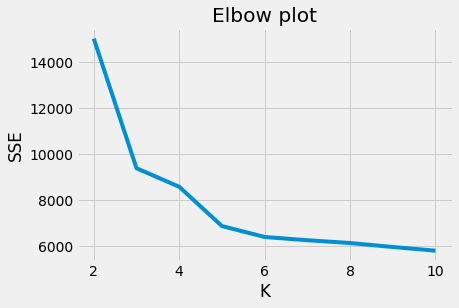

In [ ]:
#1. Trained the model Using reduced dataset


#finding optimal k value for k-medoids

sse = [] #for storing different sse corresponding to different k-value


for count in range(2, 11):
    
    #training the model
    kMedoids = KMedoids(n_clusters = count, random_state = 0)
    kMedoids.fit(data_kmedoids_pca)

    #computing sse
    curr_sse = kMedoids.inertia_

    #storing sse
    sse.append(curr_sse)



#Elbow plot
plt.plot(range(2, 11), sse)
plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('SSE')      #within cluster sum of squares
plt.show()

#from graph we can select k=3 as number of clusters

In [ ]:

kMedoids = KMedoids(n_clusters = 3, random_state = 0)
kMedoids.fit(data_kmedoids_pca)

kmedoids_labels = kMedoids.fit_predict(data_kmedoids_pca)
kmedoids_score = silhouette_score(data_kmedoids_pca, kmedoids_labels)
kmedoids_centers = kMedoids.cluster_centers_
kmedoids_sse = kMedoids.inertia_



print("Cluster Centers: \n" , kmedoids_centers ,"\n")
print("labels: \n" , kmedoids_labels,"\n")
print("Silhouete Score: \n" ,kmedoids_score , "\n")
print("SSE : " ,kmedoids_sse , "\n" )

from collections import Counter
print("Elements in each cluster : \n" , Counter(kmedoids_labels) ,"\n")

Cluster Centers: 
 [[ 9.06754915  0.30856096]
 [-3.35946227  0.45324548]
 [ 0.78287487  0.4050173 ]] 

labels: 
 [2 2 1 ... 1 0 0] 

Silhouete Score: 
 0.5636785585307372 

SSE :  9395.500476366498 

Elements in each cluster : 
 Counter({1: 2446, 2: 2297, 0: 1077}) 





---



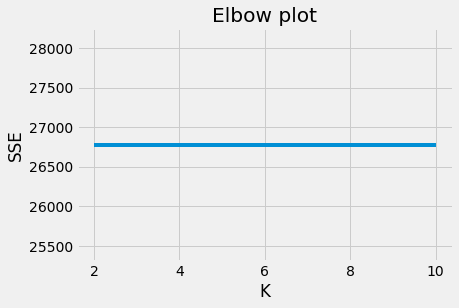

In [ ]:
#1. Trained the model Using full dataset


#finding optimal k value for k-medoids

sse = [] #for storing different sse corresponding to different k-value


for count in range(2, 11):
    
    #training the model
    kMedoids = KMedoids(n_clusters = count, random_state = 0)
    kMedoids.fit(data_kmedoids_whole)

    #computing sse
    curr_sse = kMedoids.inertia_

    #storing sse
    sse.append(curr_sse)



#Elbow plot
plt.plot(range(2, 11), sse)
plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('SSE')      #within cluster sum of squares
plt.show()

#from graph we can select k=3 as number of clusters

In [ ]:

kMedoids = KMedoids(n_clusters = 3, random_state = 0)
kMedoids.fit(data_kmedoids_whole)

kmedoids_labels = kMedoids.fit_predict(data_kmedoids_whole)
kmedoids_score = silhouette_score(data_kmedoids_whole, kmedoids_labels)
kmedoids_centers = kMedoids.cluster_centers_
kmedoids_sse = kMedoids.inertia_



print("Cluster Centers: \n" , kmedoids_centers ,"\n")
print("labels: \n" , kmedoids_labels,"\n")
print("Silhouete Score: \n" ,kmedoids_score , "\n")
print("SSE : " ,kmedoids_sse , "\n" )

from collections import Counter
print("Elements in each cluster : \n" , Counter(kmedoids_labels) ,"\n")

Cluster Centers: 
 [[ 0.05227822 -0.05749034 -0.14256075 -0.06420806 -0.08276145 -0.08385143
  -0.05185591 -0.03266742 -0.13081382 -0.0711431  -0.14193186 -0.02724063
  -0.19206155 -0.23173869 -0.22927532 -0.13167721 -0.31438151 -0.17387712
  -0.20632104 -0.22353454 -0.24206378 -0.25036547 -0.15865868 -0.13077176
  -0.24860684 -0.17485237 -0.11984497 -0.24094785]
 [ 0.05227822 -0.05749034 -0.14256075 -0.06420806 -0.08276145 -0.08385143
  -0.05185591 -0.03266742 -0.13081382 -0.0711431  -0.14193186 -0.02724063
  -0.19206155 -0.23173869 -0.22927532 -0.13167721 -0.31438151 -0.17387712
  -0.20632104 -0.22353454 -0.24206378 -0.25036547 -0.15865868 -0.13077176
  -0.24860684 -0.17485237 -0.11984497 -0.24094785]
 [ 0.05227822 -0.05749034 -0.14256075 -0.06420806 -0.08276145 -0.08385143
  -0.05185591 -0.03266742 -0.13081382 -0.0711431  -0.14193186 -0.02724063
  -0.19206155 -0.23173869 -0.22927532 -0.13167721 -0.31438151 -0.17387712
  -0.20632104 -0.22353454 -0.24206378 -0.25036547 -0.15865868 -0.



---



Using Own Implementation

In [ ]:
#3.Trained the model using reduced dataset (with randomly choosen  1000 patterns)

#converting data to numpy array for using it as datapoints/patterns for k-medoids algorithm
number_of_rows = X_pca.shape[0]
random_indices = np.random.choice(number_of_rows,size = 1000 ,replace=False)

datapoints =X_pca[random_indices, :]
print(datapoints)
m, f = datapoints.shape

print()
print("No of patterns: " ,m,"No of Features: " , f)
k = 3 # no of clusters

[[ 0.78287487  0.4050173 ]
 [-1.90585078  0.01343359]
 [ 0.9094825   0.15360692]
 ...
 [-3.35946227  0.45324548]
 [ 9.06754915  0.30856096]
 [ 0.78287487  0.4050173 ]]

No of patterns:  1000 No of Features:  2


In [ ]:
#randomly select 𝑘 of the 𝑚 data points as the medoids
#It should return a NumPy array of size 𝑘×𝑑, where 𝑑 is the number of columns of X.

def init_medoids(X, k):
    from numpy.random import choice
    from numpy.random import seed
 
    seed(1)
    samples = choice(len(X), size=k, replace=False)
    return X[samples, :]

medoids_initial = init_medoids(datapoints, 3)
print("Intial Medoids : \n")
print(medoids_initial ,"\n")





# it will compute distances distance from an object/pattern to k medoids/representatives respectively
# it will return a numpy array of array of size m X 𝑘, where m is the number of rows of X.
def compute_d_p(X, medoids):
    m = len(X)
    medoids_shape = medoids.shape
    # If a 1-D array is provided, 
    # it will be reshaped to a single row 2-D array
    if len(medoids_shape) == 1: 
        medoids = medoids.reshape((1,len(medoids)))
    k = len(medoids)
    
    S = np.empty((m, k))
    
    for i in range(m):
        d_i = np.linalg.norm(X[i, :] - medoids, axis=1) #calculating eucliden distance using inbuilt function
        S[i, :] = d_i  #storing distance in numpy array S

    return S





# compute numpy array of distances between object(pattern) to k medoids(cluster representative)
#this numpy array will contain k distances(d1,d2...dk)
#d1:distance between pattern1 to medoid 1(represetative of cluster 1)
#d2:distance between pattern2 to medoid 1(represetative of cluster 2)

# we will use this distances for cluster assignment

S = compute_d_p(datapoints, medoids_initial)
print("Intial distance matrix: \n" ,S ,"\n")




#cluster assignment
#assigning  each pattern of X to that cluster which have minimum distance from all of the k-medoids

#function that acts on the distance matrix S to assign a “cluster label” of 0, 1, 2 to each point using the minimum distance to find the “most similar” medoid.
def assign_labels(S):
    return np.argmin(S, axis=1)




#cluster assignment
labels = assign_labels(S)
#each Patterns belong to which cluster
print(" Intial labels : \n" , labels ,"\n")





# medoids Updation
# for each medoid 𝑗 and each data point 𝑖 associated to 𝑗 swap 𝑗 and 𝑖 and compute the total cost of the configuration (that is the average dissimilarity of 𝑖 to all the data points)
# Select the medoid 𝑗 with the lowest cost of the configuration.

def update_medoids(X, medoids):
    
    S = compute_d_p(datapoints, medoids) #computes distance matrix
    labels = assign_labels(S) #cluster assignment on the basis of distance matix
        
    out_medoids = medoids  #out_medoids will store the updated medoids
                
    
    #for each pair of selected medoid i
    for i in set(labels):
        
        #curr SSE
        avg_dissimilarity = np.sum(compute_d_p(datapoints, medoids[i]))

        #and non-selected medoid j of that cluster
        cluster_points = datapoints[labels == i]
       
        #for each cluster, search if any of the points in the cluster decreases the average dissimilarity coefficient.
        #Select the point that decreases this coefficient the most as the new medoid for this cluster.
        for datap in cluster_points:
            new_medoid = datap

            #new SSE
            new_dissimilarity= np.sum(compute_d_p(datapoints, datap))
            
            if new_dissimilarity < avg_dissimilarity :
                avg_dissimilarity = new_dissimilarity #update SSE for that cluster
                
                out_medoids[i] = datap #update the medoid of that cluster
                
    return out_medoids





# This is the function to check whether the medoids no longer move and the iteration should be stopped.
def has_converged(old_medoids, medoids):
    return set([tuple(x) for x in old_medoids]) == set([tuple(x) for x in medoids])

Intial Medoids : 

[[-6.99536888 -0.50416789]
 [ 9.06754915  0.30856096]
 [ 0.10761129 -2.71956394]] 

Intial distance matrix: 
 [[ 7.83120002  8.28523577  3.19671532]
 [ 5.11577031 10.97736791  3.39459938]
 [ 7.9321714   8.15953811  2.9829697 ]
 ...
 [ 3.75984804 12.42785366  4.69971473]
 [16.08346555  0.          9.45780244]
 [ 7.83120002  8.28523577  3.19671532]] 

 Intial labels : 
 [2 2 2 1 0 1 0 1 0 2 2 1 2 0 1 1 0 2 2 1 2 0 0 2 0 1 2 0 0 0 0 2 0 0 0 0 2
 0 2 0 0 0 0 2 2 2 2 2 2 2 0 2 1 0 2 2 2 2 0 2 1 2 0 1 1 2 0 2 0 2 0 0 0 0
 2 0 0 0 0 1 0 0 1 0 0 1 1 0 2 2 0 0 2 2 0 2 1 0 2 2 1 2 0 2 2 0 0 2 2 0 2
 2 0 2 2 0 2 1 2 2 2 2 0 0 1 2 1 0 0 2 1 0 2 1 0 0 2 0 2 1 2 2 1 0 0 0 1 2
 2 2 2 2 2 0 2 1 2 0 0 1 2 2 1 1 0 2 0 2 0 2 2 0 1 0 0 0 2 2 0 0 0 0 2 2 0
 2 2 0 2 1 2 1 1 0 2 2 2 2 2 0 1 0 2 2 2 2 1 2 2 0 2 2 0 2 1 2 1 0 1 0 0 2
 1 2 2 0 0 2 2 2 1 2 2 0 1 1 0 2 2 2 1 1 2 2 2 0 2 1 2 1 1 1 2 2 2 1 0 2 1
 2 2 2 2 1 0 0 1 0 2 0 2 2 0 1 2 0 2 2 0 0 0 0 0 2 2 2 1 0 0 0 2 2 2 2 1 2
 2 2 1 2 1

In [ ]:
# Main Algorithm
#X:Datapoints , k:no of clusters ,max_steps: no of iterations

def kmedoids(X, k, starting_medoids=None, max_steps=np.inf):
    
    #intialising the medoids if not present
    if starting_medoids is None:
        medoids = init_medoids(X, k)
    else:
        medoids = starting_medoids
        
    
    converged = False #for convergence checking
    labels = np.zeros(len(X))
    i = 1

    #convergence criteria
    while (not converged) and (i <= max_steps):
       
        old_medoids = medoids.copy()   #old medoids
        
        S = compute_d_p(X, medoids)   #computes distance matrix
        
        labels = assign_labels(S)     #cluster assignment on the basis of distance matrix
        
        medoids = update_medoids(X, medoids)  #updation of medoids to find best set of medoids(i.e which have smallest sse value)
        
        converged = has_converged(old_medoids, medoids) #convergence checking
        i += 1
    return (medoids,labels)   #return final set of medoids and cluster assignments



# calling k-medoids function
results = kmedoids(datapoints, 3)
final_medoids = results[0]

print()
print("Final Medoids Set :\n")
print(final_medoids ,"\n")

print("Final Clusters : \n")
print(results[1] ,"\n")


#computing Silhouette_score and sse
score = silhouette_score(datapoints, labels, metric='euclidean')
print("Silhouette coefficient:", score ,"\n")



temp = compute_d_p(datapoints, final_medoids)
sse = np.sum(temp**2)
print("SSE: ", sse ,"\n")


from collections import Counter
print("Elements in each cluster : \n " ,Counter(results[1]) , "\n" )


Final Medoids Set :

[[-0.26580124  0.1577877 ]
 [ 0.63539468  0.23923679]
 [ 0.32513983  0.22126598]] 

Final Clusters : 

[1 0 1 1 0 1 0 1 0 2 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1
 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 2 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1
 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1
 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0
 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0
 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1
 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 2 1 0 0 0 1 1 0 2 1 0
 1 1 1 2 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1
 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 2 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0
 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1
 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 2



---



In [ ]:
#4.Trained the model using full dataset (with randomly choosen  1000 patterns)

#converting data to numpy array for using it as datapoints/patterns for k-medoids algorithm
data = X_whole.to_numpy()
number_of_rows = data.shape[0]
random_indices = np.random.choice(number_of_rows,size = 1000 ,replace=False)

datapoints =data[random_indices, :]
print(datapoints)
m, f = datapoints.shape

print()
print("No of patterns: " ,m,"No of Features: " , f)
k = 3 # no of clusters

[[-0.69345522 -0.83561541  0.65523116 ...  0.61218614 -0.11984497
   0.5411584 ]
 [ 1.5437451   1.49875981  1.45302307 ...  0.61218614  0.65429233
   0.5411584 ]
 [-1.43918866 -1.61374049 -0.94035267 ... -0.17485237 -0.11984497
  -0.24094785]
 ...
 [ 0.05227822 -0.05749034 -0.14256075 ... -0.17485237 -0.11984497
  -0.24094785]
 [ 1.5437451   1.49875981  1.45302307 ...  1.39922464  1.42842963
   1.32326465]
 [-1.43918866 -1.61374049 -1.73814458 ... -1.74892938 -1.66811957
  -1.80516036]]

No of patterns:  1000 No of Features:  28


In [ ]:
#randomly select 𝑘 of the 𝑚 data points as the medoids
#It should return a NumPy array of size 𝑘×𝑑, where 𝑑 is the number of columns of X.

def init_medoids(X, k):
    from numpy.random import choice
    from numpy.random import seed
 
    seed(1)
    samples = choice(len(X), size=k, replace=False)
    return X[samples, :]

medoids_initial = init_medoids(datapoints, 3)
print("Intial Medoids : \n")
print(medoids_initial ,"\n")





# it will compute distances distance from an object/pattern to k medoids/representatives respectively
# it will return a numpy array of array of size m X 𝑘, where m is the number of rows of X.
def compute_d_p(X, medoids):
    m = len(X)
    medoids_shape = medoids.shape
    # If a 1-D array is provided, 
    # it will be reshaped to a single row 2-D array
    if len(medoids_shape) == 1: 
        medoids = medoids.reshape((1,len(medoids)))
    k = len(medoids)
    
    S = np.empty((m, k))
    
    for i in range(m):
        d_i = np.linalg.norm(X[i, :] - medoids, axis=1) #calculating eucliden distance using inbuilt function
        S[i, :] = d_i  #storing distance in numpy array S

    return S





# compute numpy array of distances between object(pattern) to k medoids(cluster representative)
#this numpy array will contain k distances(d1,d2...dk)
#d1:distance between pattern1 to medoid 1(represetative of cluster 1)
#d2:distance between pattern2 to medoid 1(represetative of cluster 2)

# we will use this distances for cluster assignment

S = compute_d_p(datapoints, medoids_initial)
print("Intial distance matrix: \n" ,S ,"\n")




#cluster assignment
#assigning  each pattern of X to that cluster which have minimum distance from all of the k-medoids

#function that acts on the distance matrix S to assign a “cluster label” of 0, 1, 2 to each point using the minimum distance to find the “most similar” medoid.
def assign_labels(S):
    return np.argmin(S, axis=1)




#cluster assignment
labels = assign_labels(S)
#each Patterns belong to which cluster
print(" Intial labels : \n" , labels ,"\n")





# medoids Updation
# for each medoid 𝑗 and each data point 𝑖 associated to 𝑗 swap 𝑗 and 𝑖 and compute the total cost of the configuration (that is the average dissimilarity of 𝑖 to all the data points)
# Select the medoid 𝑗 with the lowest cost of the configuration.

def update_medoids(X, medoids):
    
    S = compute_d_p(datapoints, medoids) #computes distance matrix
    labels = assign_labels(S) #cluster assignment on the basis of distance matix
        
    out_medoids = medoids  #out_medoids will store the updated medoids
                
    
    #for each pair of selected medoid i
    for i in set(labels):
        
        #curr SSE
        avg_dissimilarity = np.sum(compute_d_p(datapoints, medoids[i]))

        #and non-selected medoid j of that cluster
        cluster_points = datapoints[labels == i]
       
        #for each cluster, search if any of the points in the cluster decreases the average dissimilarity coefficient.
        #Select the point that decreases this coefficient the most as the new medoid for this cluster.
        for datap in cluster_points:
            new_medoid = datap

            #new SSE
            new_dissimilarity= np.sum(compute_d_p(datapoints, datap))
            
            if new_dissimilarity < avg_dissimilarity :
                avg_dissimilarity = new_dissimilarity #update SSE for that cluster
                
                out_medoids[i] = datap #update the medoid of that cluster
                
    return out_medoids





# This is the function to check whether the medoids no longer move and the iteration should be stopped.
def has_converged(old_medoids, medoids):
    return set([tuple(x) for x in old_medoids]) == set([tuple(x) for x in medoids])

Intial Medoids : 

[[ 0.79801166  0.72063473  0.65523116  0.7143147   0.69917302 -0.08385143
  -0.05185591  0.74653085 -0.13081382 -0.85533411 -0.14193186  0.73865539
  -0.19206155 -1.02838321 -0.22927532  0.64477809 -0.31438151 -0.95531713
  -0.20632104  0.55971111 -0.24206378 -1.03885411 -0.15865868  0.65305074
   1.34225825  0.61218614 -0.11984497 -1.02305411]
 [-1.43918866 -0.05749034 -0.14256075 -0.06420806 -0.08276145  0.69697311
   0.73001294  0.74653085  0.65731913  0.7130479   0.63007134  0.73865539
   0.59902     0.56490583  0.56880025  0.64477809  0.47462254  0.60756289
   0.58211525  0.55971111  0.54542151  0.53812318  0.62720812  0.65305074
   0.54682571  0.61218614  0.65429233  0.5411584 ]
 [ 0.79801166  1.49875981  1.45302307  0.7143147   1.4811075   1.47779765
   1.51188179  1.52572912 -0.13081382  0.7130479   0.63007134  0.73865539
   1.39010155  1.36155035  1.36687582  1.42123339  1.2636266   1.38900291
   1.37055155  1.34295675  1.3329068   1.32661182  1.41307492  1.

In [ ]:
# Main Algorithm
#X:Datapoints , k:no of clusters ,max_steps: no of iterations

def kmedoids(X, k, starting_medoids=None, max_steps=np.inf):
    
    #intialising the medoids if not present
    if starting_medoids is None:
        medoids = init_medoids(X, k)
    else:
        medoids = starting_medoids
        
    
    converged = False #for convergence checking
    labels = np.zeros(len(X))
    i = 1

    #convergence criteria
    while (not converged) and (i <= max_steps):
       
        old_medoids = medoids.copy()   #old medoids
        
        S = compute_d_p(X, medoids)   #computes distance matrix
        
        labels = assign_labels(S)     #cluster assignment on the basis of distance matrix
        
        medoids = update_medoids(X, medoids)  #updation of medoids to find best set of medoids(i.e which have smallest sse value)
        
        converged = has_converged(old_medoids, medoids) #convergence checking
        i += 1
    return (medoids,labels)   #return final set of medoids and cluster assignments



# calling k-medoids function
results = kmedoids(datapoints, 3)
final_medoids = results[0]

print()
print("Final Medoids Set :\n")
print(final_medoids ,"\n")

print("Final Clusters : \n")
print(results[1] ,"\n")


#computing Silhouette_score and sse
score = silhouette_score(datapoints, labels, metric='euclidean')
print("Silhouette coefficient:", score ,"\n")



temp = compute_d_p(datapoints, final_medoids)
sse = np.sum(temp**2)
print("SSE: ", sse ,"\n")


from collections import Counter
print("Elements in each cluster : \n " ,Counter(results[1]) , "\n" )


Final Medoids Set :

[[ 0.05227822 -0.05749034 -0.14256075 -0.06420806 -0.08276145 -0.08385143
  -0.05185591 -0.03266742 -0.13081382 -0.0711431  -0.14193186 -0.02724063
  -0.19206155 -0.23173869 -0.22927532 -0.13167721 -0.31438151 -0.17387712
  -0.20632104 -0.22353454 -0.24206378 -0.25036547 -0.15865868 -0.13077176
  -0.24860684 -0.17485237 -0.11984497 -0.24094785]
 [-0.69345522 -0.83561541 -0.14256075 -0.06420806 -0.08276145 -0.08385143
  -0.05185591 -0.03266742 -0.13081382 -0.0711431  -0.14193186  0.73865539
  -0.19206155 -0.23173869 -0.22927532 -0.13167721 -0.31438151 -0.17387712
  -0.20632104 -0.22353454 -0.24206378 -0.25036547 -0.15865868 -0.13077176
  -0.24860684 -0.17485237 -0.11984497 -0.24094785]
 [ 0.05227822 -0.05749034 -0.14256075 -0.06420806 -0.08276145 -0.08385143
  -0.05185591 -0.03266742 -0.13081382 -0.0711431  -0.14193186 -0.02724063
  -0.19206155 -0.23173869  0.56880025  0.64477809  0.47462254  0.60756289
   0.58211525  0.55971111  0.54542151  0.53812318  0.62720812 



---



---



---



---



#Model 3: **Fuzzy clustering algorithm**

In [ ]:
#Datasets

data_fcm_pca = X_pca
data_fcm_whole = X_whole.to_numpy()

print("Reduced dataset: \n", data_fcm_pca,"\n")
print("Whole dataset: \n", data_fcm_whole,"\n")

Reduced dataset: 
 [[ 0.78287487  0.4050173 ]
 [ 0.78287487  0.4050173 ]
 [-7.50179941  0.50147365]
 ...
 [-7.50179941  0.50147365]
 [ 9.06754915  0.30856096]
 [ 9.06754915  0.30856096]] 

Whole dataset: 
 [[ 0.05227822 -0.05749034 -0.14256075 ... -0.17485237 -0.11984497
  -0.24094785]
 [ 0.05227822 -0.05749034 -0.14256075 ... -0.17485237 -0.11984497
  -0.24094785]
 [ 1.5437451   1.49875981  1.45302307 ...  1.39922464  1.42842963
   1.32326465]
 ...
 [ 1.5437451   1.49875981  1.45302307 ...  1.39922464  1.42842963
   1.32326465]
 [-1.43918866 -1.61374049 -1.73814458 ... -1.74892938 -1.66811957
  -1.80516036]
 [-1.43918866 -1.61374049 -1.73814458 ... -1.74892938 -1.66811957
  -1.80516036]] 



Using Inbuilt Funtions

In [ ]:
pip install fuzzy-c-means

In [ ]:
#Trained the model using reduced dataset
import numpy as np
import pandas as pd
from fcmeans import FCM
from sklearn.metrics import silhouette_score


fcm = FCM(n_clusters=3)
fcm.fit(data_fcm_pca)

fcm_centers = fcm.centers
fcm_labels = fcm.predict(data_fcm_pca)
fcm_sse = fcm.error

print("Cluster Centers : \n ", fcm_centers , "\n")
print("Cluster labels : \n ", fcm_labels , "\n")
print("Silhouette Coefficient: ", silhouette_score(data_fcm_pca, fcm_labels) ,"\n")
print("SSE : " , fcm_sse , "\n")

from collections import Counter
print("Elements in each Cluster : \n" , Counter(fcm_labels) ,"\n")

Cluster Centers : 
  [[ 7.90097102  0.25554942]
 [ 0.78686495 -0.07238548]
 [-4.81164362  0.18337276]] 

Cluster labels : 
  [1 1 2 ... 2 0 0] 

Silhouette Coefficient:  0.5734417763169023 

SSE :  1e-05 

Elements in each Cluster : 
 Counter({1: 2394, 2: 2241, 0: 1185}) 





---



In [ ]:
#Trained the model using full dataset
import numpy as np
import pandas as pd
from fcmeans import FCM
from sklearn.metrics import silhouette_score


fcm = FCM(n_clusters=3)
fcm.fit(data_fcm_whole)

fcm_centers = fcm.centers
fcm_labels = fcm.predict(data_fcm_whole)
fcm_Sse = fcm.error

print("Cluster Centers : \n ", fcm_centers , "\n")
print("Cluster labels : \n ", fcm_labels , "\n")
print("Silhouette Coefficient: ", silhouette_score(data_fcm_whole, fcm_labels) ,"\n")
print("SSE : " , fcm_Sse , "\n")


from collections import Counter
print("Elements in each Cluster : \n" , Counter(fcm_labels) ,"\n")

Cluster Centers : 
  [[ 0.87863436  0.91086431  0.87803801  0.89842957  0.9170024   0.89980621
   0.91922357  0.92160025  0.87720416  0.93144148  0.86849694  0.89945137
   0.88453129  0.86936474  0.87121626  0.90874947  0.7865224   0.88386935
   0.87489757  0.86119216  0.85215419  0.85387086  0.90442103  0.90729428
   0.8535111   0.88464606  0.88370229  0.83971551]
 [-1.22111888 -1.37686759 -1.44306186 -1.37087635 -1.41775495 -1.40911153
  -1.38693176 -1.36843686 -1.41099936 -1.42811332 -1.41881629 -1.34491486
  -1.51481753 -1.55000337 -1.54170584 -1.47142177 -1.52949542 -1.49361467
  -1.52193946 -1.53040862 -1.53545382 -1.5366649  -1.49398173 -1.46735586
  -1.54115998 -1.49262137 -1.43302453 -1.51924897]
 [-0.11208682 -0.13181311 -0.13607076 -0.1247245  -0.13187339 -0.12303784
  -0.12367716 -0.12196978 -0.13942425 -0.13201927 -0.13674293 -0.11797617
  -0.14035078 -0.13947716 -0.14439515 -0.13579251 -0.14325226 -0.13781569
  -0.14080503 -0.14008537 -0.14465493 -0.15022128 -0.14133115 -



---



---



---



#Model 4: **Self Organising Feature Map**

In [ ]:
#Datasets

data_som_pca = X_pca
data_som_whole = X_whole.to_numpy()

print("Reduced dataset: \n", data_som_pca,"\n")
print("Whole dataset: \n", data_som_whole,"\n")

Reduced dataset: 
 [[ 0.78287487  0.4050173 ]
 [ 0.78287487  0.4050173 ]
 [-7.50179941  0.50147365]
 ...
 [-7.50179941  0.50147365]
 [ 9.06754915  0.30856096]
 [ 9.06754915  0.30856096]] 

Whole dataset: 
 [[ 0.05227822 -0.05749034 -0.14256075 ... -0.17485237 -0.11984497
  -0.24094785]
 [ 0.05227822 -0.05749034 -0.14256075 ... -0.17485237 -0.11984497
  -0.24094785]
 [ 1.5437451   1.49875981  1.45302307 ...  1.39922464  1.42842963
   1.32326465]
 ...
 [ 1.5437451   1.49875981  1.45302307 ...  1.39922464  1.42842963
   1.32326465]
 [-1.43918866 -1.61374049 -1.73814458 ... -1.74892938 -1.66811957
  -1.80516036]
 [-1.43918866 -1.61374049 -1.73814458 ... -1.74892938 -1.66811957
  -1.80516036]] 



Using Inbuilt Functions

In [ ]:
#Trained the model using reduced dataset

!pip install sklearn-som
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn_som.som import SOM
model = SOM(m=3, n=1, dim=2)
model.fit((pd.DataFrame(data_som_pca)).values)
som_labels = model.predict((pd.DataFrame(data_som_pca)).values)
som_centers = model.cluster_centers_
som_sse = model.inertia_


print("\n" ,"Cluster Centers : \n ", som_centers , "\n")
print("Cluster labels : \n ", som_labels , "\n")
print("Silhouette Coefficient: ", silhouette_score(data_som_pca, som_labels) ,"\n")
print("SSE : " , som_sse,"\n")



from collections import Counter
print("Elements in each Cluster : \n" , Counter(som_labels) ,"\n")


 Cluster Centers : 
  [[[ 4.82688911  0.26466723]]

 [[ 0.42258178  0.05807363]]

 [[-3.4835297   0.13963439]]] 

Cluster labels : 
  [1 1 2 ... 2 0 0] 

Silhouette Coefficient:  0.5497654874178621 

SSE :  33919.651370962645 

Elements in each Cluster : 
 Counter({2: 2380, 1: 2011, 0: 1429}) 





---



In [ ]:
#Trained the model using full dataset

!pip install sklearn-som
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn_som.som import SOM
model = SOM(m=3, n=1, dim=28)
model.fit((pd.DataFrame(data_som_whole)).values)
som_labels = model.predict((pd.DataFrame(data_som_whole)).values)
som_centers = model.cluster_centers_
som_sse =model.inertia_

print("\n" , "Cluster Centers : \n ", som_centers , "\n")
print("Cluster labels : \n ", som_labels , "\n")
print("Silhouette Coefficient: ", silhouette_score(data_som_whole, som_labels) ,"\n")
print("SSE : " , som_sse,"\n")


from collections import Counter
print("Elements in each Cluster : \n" , Counter(som_labels) ,"\n")


 Cluster Centers : 
  [[[-7.57265813e-01 -7.38430158e-01 -7.40532735e-01 -8.02600750e-01
   -8.17290238e-01 -7.73287454e-01 -7.68134099e-01 -8.06370666e-01
   -8.49783573e-01 -8.42200973e-01 -8.19765970e-01 -8.23218490e-01
   -8.57901455e-01 -8.40502814e-01 -8.26348150e-01 -8.50487758e-01
   -7.50377098e-01 -7.67176679e-01 -8.30603321e-01 -8.44285604e-01
   -7.85851048e-01 -8.46307597e-01 -8.78248163e-01 -8.79650310e-01
   -8.63612430e-01 -8.28444475e-01 -7.44419269e-01 -8.47493246e-01]]

 [[-4.45007937e-02 -4.67191328e-02 -2.50869487e-02 -1.25531257e-02
   -4.88444756e-02 -4.54007789e-02 -3.93795805e-02 -9.88928301e-02
   -1.51511746e-01 -7.37015988e-02 -1.08898757e-01 -1.21776258e-01
   -1.25831672e-02 -2.48522992e-02 -1.46488211e-02 -1.10704118e-02
    3.43084886e-02  4.76987555e-02 -2.50559538e-02 -3.60612369e-02
    4.18463228e-04 -1.77926181e-02 -1.87514200e-03 -1.41599829e-02
   -2.42631381e-02 -6.67767962e-02 -1.11853389e-02 -2.02618464e-02]]

 [[ 5.88056863e-01  6.44595050e-0




---


---



---



#**Result Analysis**

Text(0, 0.5, 'Silhouette-Score')

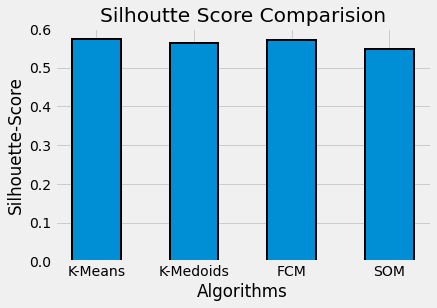

In [ ]:
#comparing different Silhouette Score values

from matplotlib import pyplot as plt

plt.title("Silhoutte Score Comparision")

# Data
algo = ['K-Means', 'K-Medoids', 'FCM', 'SOM']
score  = [.574, .563, .573, .549]

# Plot
plt.bar(algo, score, width=0.50, edgecolor='k', linewidth=2)

plt.xlabel("Algorithms")
plt.ylabel("Silhouette-Score")


Text(0, 0.5, 'Sum Square Error')

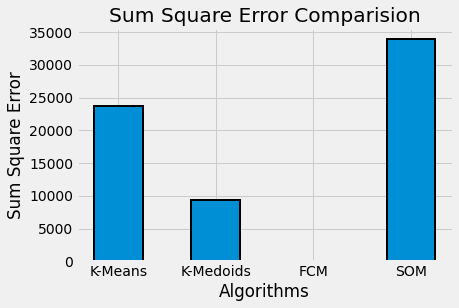

In [ ]:
#Comparing different sse values
from matplotlib import pyplot as plt

plt.title("Sum Square Error Comparision")

# Data
algo = ['K-Means', 'K-Medoids', 'FCM', 'SOM']
sse  = [23705.24, 9395.50, .5, 33919.65]

# Plot
plt.bar(algo, sse, width=0.50, edgecolor='k', linewidth=2)

plt.xlabel("Algorithms")
plt.ylabel("Sum Square Error")

Text(0, 0.5, 'Elements in 0th clusters')

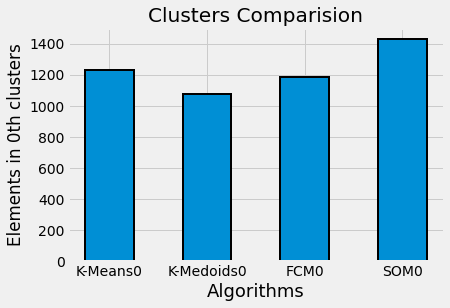

In [ ]:
#plotting different clusters count of different algo
from matplotlib import pyplot as plt

plt.title("Clusters Comparision")

# Data
algo1 = ['K-Means0', 'K-Medoids0', 'FCM0', 'SOM0' ]
clusters1  = [1229, 1077, 1185, 1429 ]


# Plot
plt.bar(algo1, clusters1, width=.5, edgecolor='k', linewidth=2)

plt.xlabel("Algorithms" , fontsize=18)
plt.ylabel("Elements in 0th clusters")

Text(0, 0.5, 'Elements in 1st clusters')

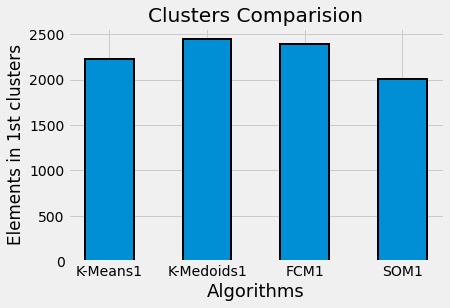

In [ ]:
#plotting different clusters count of different algo
from matplotlib import pyplot as plt

plt.title("Clusters Comparision")

algo2 = ['K-Means1', 'K-Medoids1', 'FCM1', 'SOM1'  ]
clusters2  = [2229,2446,2394,2011  ]

plt.bar(algo2, clusters2, width=.5, edgecolor='k', linewidth=2)

plt.xlabel("Algorithms" , fontsize=18)
plt.ylabel("Elements in 1st clusters")

Text(0, 0.5, 'Elements in 2nd clusters')

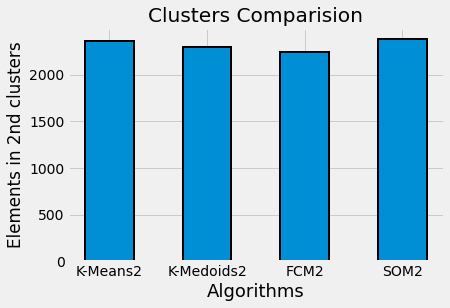

In [ ]:
#plotting different clusters count of different algo
from matplotlib import pyplot as plt

plt.title("Clusters Comparision")


algo3 = ['K-Means2', 'K-Medoids2', 'FCM2', 'SOM2']
clusters3 = [2362 , 2297 ,2241 , 2380]

plt.bar(algo3, clusters3, width=.5, edgecolor='k', linewidth=2)


plt.xlabel("Algorithms" , fontsize=18)
plt.ylabel("Elements in 2nd clusters")

Text(0, 0.5, 'Elements in each Cluster')

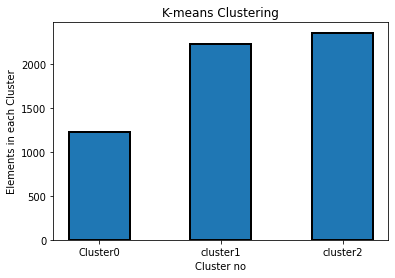

In [1]:
#K-means Cluster
from matplotlib import pyplot as plt

plt.title("K-means Clustering")

# Data
algo = ['Cluster0', 'cluster1', 'cluster2']
sse  = [1229, 2229, 2362]

# Plot
plt.bar(algo, sse, width=0.50, edgecolor='k', linewidth=2)

plt.xlabel("Cluster no")
plt.ylabel("Elements in each Cluster")

Text(0, 0.5, 'Elements in each Cluster')

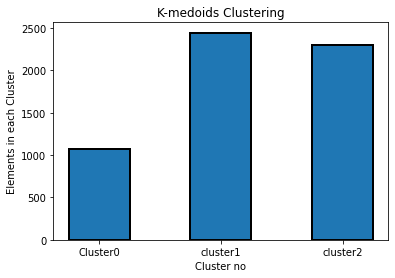

In [2]:
#K-medoids Clustering
from matplotlib import pyplot as plt

plt.title("K-medoids Clustering")

# Data
algo = ['Cluster0', 'cluster1', 'cluster2']
sse  = [1077, 2446, 2297]

# Plot
plt.bar(algo, sse, width=0.50, edgecolor='k', linewidth=2)

plt.xlabel("Cluster no")
plt.ylabel("Elements in each Cluster")

Text(0, 0.5, 'Elements in each Cluster')

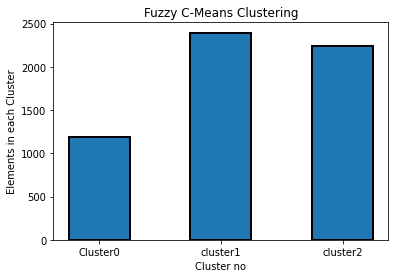

In [3]:
#Fuzzy C-Means Clustering
from matplotlib import pyplot as plt

plt.title("Fuzzy C-Means Clustering")

# Data
algo = ['Cluster0', 'cluster1', 'cluster2']
sse  = [1185, 2394, 2241]

# Plot
plt.bar(algo, sse, width=0.50, edgecolor='k', linewidth=2)

plt.xlabel("Cluster no")
plt.ylabel("Elements in each Cluster")

Text(0, 0.5, 'Elements in each Cluster')

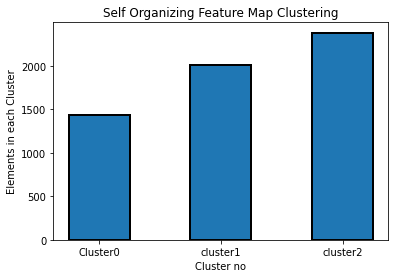

In [4]:
#Self Organizing Feature Map 
from matplotlib import pyplot as plt

plt.title("Self Organizing Feature Map Clustering")

# Data
algo = ['Cluster0', 'cluster1', 'cluster2']
sse  = [1429, 2011, 2380]

# Plot
plt.bar(algo, sse, width=0.50, edgecolor='k', linewidth=2)

plt.xlabel("Cluster no")
plt.ylabel("Elements in each Cluster")
